<a href="https://colab.research.google.com/github/Ryan47Liao/A.M.B.S/blob/main/GPK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

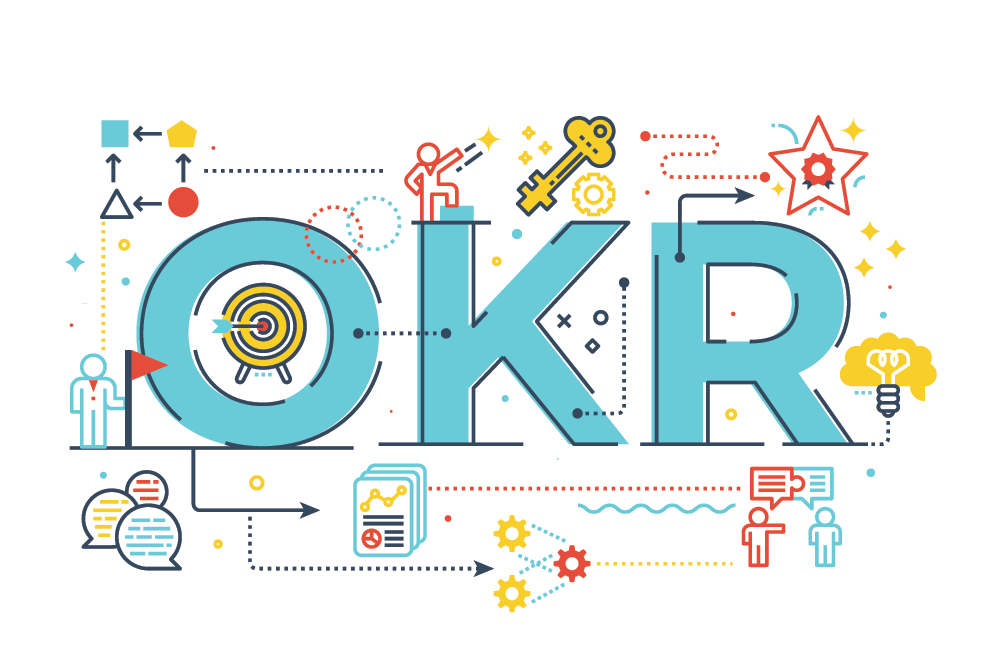

##Version **0.997**
#### Content: 1.Updated Slot Machine for more accurate pricing 2.Now you can load pictures off-line. 3.TaskToday Preview is upgraded into a nicely table 4.Tasks are now tokenized too!
###By Leonidas Liao *2020-10-26*

In [ ]:
#Connection Check
def drive_connected():
    global server_online
    try:
        INfile = open("/content/drive/Shared drives/GPK_OKR/GPK/GPK_files/GPK_accounts","rb")
        INfile.close()
        server_online = True
    except FileNotFoundError:
        server_online = False
        switch_on = False
    return server_online


online = drive_connected ()
local_pics = False

# Library


In [ ]:
!pip install python-docx

     |████████████████████████████████| 5.5MB 12.4MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.10-cp36-none-any.whl size=184491 sha256=a1a27f32fcbf4f2b23b279211358a531b6295dc66be96bafac81b077f410023a
  Stored in directory: /root/.cache/pip/wheels/18/0b/a0/1dd62ff812c857c9e487f27d80d53d2b40531bec1acecfa47b
Successfully built python-docx


In [ ]:
!pip install fabulous

     |████████████████████████████████| 593kB 11.9MB/s 
  Created wheel for fabulous: filename=fabulous-0.3.0-cp36-none-any.whl size=593791 sha256=6718d30d280b3ba2d4c5205ef6fd07d3f77a85a1057c7f07993558548ce83226
  Stored in directory: /root/.cache/pip/wheels/1b/26/6f/6cb59aa73a8a6e34cc5f5f5ecca18429f6d459356d38ca19dc
Successfully built fabulous


In [ ]:
#@title Packages {display-mode: "form"}
import numpy as np
from IPython.display import clear_output
import random
from math import sqrt
from collections import namedtuple
import pickle
import smtplib
import matplotlib.pyplot as plt
import matplotlib.image as img
from math import *
from time import sleep
import time
import datetime 
import calendar 
import email
import imaplib
import docx
from tqdm import tqdm_notebook
from dateutil import tz
import sys
import io
from PIL import Image
import requests
from io import BytesIO
from copy import deepcopy
import os
import pandas as pd
from datetime import date
try:
    import fabulous.color
    from fabulous.color import *
    FAB = True
    print("FAB!")
except:
    FAB = False
    def red(text):
        return text

FAB!


In [ ]:
#@title Pictures {display-mode: "form"}
#Store Pictures: Prize
def img_load(url):
        "Take in an url and return a printable image"
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        return img

def img_Prize(n):
    "Print Prize n"
    return(pics["Prize_pic"]["P"+str(n)])

def Load_image():
    try:
        print("Loading Pictures from linkpickture.com")
        Loaded_pics = {}
        try:
            Prize_pic = {"P1":img_load ("https://drive.google.com/uc?id=12F6iPMlU54Iwxt8z9UmSLUcaNhbeeCzt"),
                    "P2":img_load("https://drive.google.com/uc?id=1a98z8JfgKGIbDMAmFowfbhy4Nr4eiWvs"),
                    "P3":img_load("https://drive.google.com/uc?id=1_PjiRxs1KFoFGfTIugg-qv9_3708LJQB"),
                    "P4":img_load("https://drive.google.com/uc?id=129k4EmYxHQWPUtKJkc3a3zeHmWposUN_"),
                    "P5":img_load("https://drive.google.com/uc?id=14XrI0pdIv3nl4OTpkHbQVSZOcK_YlwiY")}
            Loaded_pics["Prize_pic"] = Prize_pic
            print("✅",end = "")        
        except:
            print("❌",end = "")
            print("Prize_pic failed to load")
            Loaded_pics["Prize_pic"] = {"P1":"🏆",
                    "P2":"🥇",
                    "P3":"🥈",
                    "P4":"🥉",
                    "P5":"👍🏿👍🏿👍🏿"}
            pass
        try:
            #menu pictures 
            menu_welcome_img = img_load("https://www.linkpicture.com/q/GPK_Welcome.png")
            Loaded_pics["menu_welcome_img"] = menu_welcome_img
            goodbye_img = img_load("https://www.linkpicture.com/q/GPK_goodbye.png")
            Loaded_pics["goodbye_img"] = goodbye_img
            welcome_img = img_load("https://www.linkpicture.com/q/OKR_Menu.png")
            Loaded_pics["welcome_img"] = welcome_img
            welldone_img = img_load("https://www.linkpicture.com/q/GPK_welldone.png")
            Loaded_pics["welldone_img"] = welldone_img
            checked_img = img_load("https://www.linkpicture.com/q/GPK_green_check.png")
            Loaded_pics["checked_img"] = checked_img
            awesome_img = img_load("https://www.linkpicture.com/q/GPK_awesome.png")
            Loaded_pics["awesome_img"] = awesome_img
            print("✅",end = "") 
        except:
            print("❌",end = "")
            print("menu failed to load")
            menu_welcome_img = "WELCOME🙆"
            Loaded_pics["menu_welcome_img"] = menu_welcome_img
            goodbye_img = "GOODBYE👋👋👋"
            Loaded_pics["goodbye_img"] = goodbye_img
            welcome_img = "⚡⚡⚡OKR⚡⚡⚡"
            Loaded_pics["welcome_img"] = welcome_img
            welldone_img = "Welldone👍🏻👍🏻👍🏻"
            Loaded_pics["welldone_img"] = welldone_img
            checked_img = "✅"
            Loaded_pics["checked_img"] = checked_img
            awesome_img = "AWESOME👍🏻👍🏻👍🏻!"
            Loaded_pics["awesome_img"] = awesome_img

        try:
            #Store Pictures: Dice_Faces
            diceFaces=[img_load("https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/U%2B2680.svg/200px-U%2B2680.svg.png"),
                            img_load("https://upload.wikimedia.org/wikipedia/commons/thumb/1/16/U%2B2681.svg/200px-U%2B2681.svg.png"),
                            img_load("https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/U%2B2682.svg/200px-U%2B2682.svg.png"),
                            img_load("https://upload.wikimedia.org/wikipedia/commons/thumb/b/be/U%2B2683.svg/200px-U%2B2683.svg.png"),
                            img_load("https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/U%2B2684.svg/200px-U%2B2684.svg.png"),
                            img_load("https://upload.wikimedia.org/wikipedia/commons/thumb/8/82/U%2B2685.svg/200px-U%2B2685.svg.png")]
            Loaded_pics["diceFaces"] = diceFaces
            print("✅",end = "")
        except:
            print("❌",end = "")
            print("Store Pictures Failed to load")
        
        try:
            Win_Lose = {"Win":img_load("https://www.linkpicture.com/q/GPK_Win.png"),
                    "Lose":img_load("https://www.linkpicture.com/q/GPK_Lose.png")}
            Loaded_pics["Win_Lose"] = Win_Lose
            Gamble_entry_img = img_load("https://www.linkpicture.com/q/GPK_Gamble_Entry.png")
            Loaded_pics["Gamble_entry_img"] = Gamble_entry_img
            BlackJack = img_load("https://www.linkpicture.com/q/GPK_BJ.png")
            Loaded_pics["BlackJack"] = BlackJack
            JackPot = img_load("https://www.linkpicture.com/q/JackPot-min.png")
            Loaded_pics["JackPot"] = JackPot
            print("✅",end = "")
        except:
            print("❌",end = "")
            print("Store pictures fail to load")
            Win_Lose = {"Win":"👏👏👏",
                    "Lose":"😿😿😿"}
            Loaded_pics["Win_Lose"] = Win_Lose
            Gamble_entry_img = "🎲"
            Loaded_pics["Gamble_entry_img"] = Gamble_entry_img
            BlackJack = "🃏"
            Loaded_pics["BlackJack"] = BlackJack
            JackPot = "🎰🎰🎰"
            Loaded_pics["JackPot"] = JackPot
    except:
        print("Something Wrong...")
    finally:
        print("Loaded Pictures:")
        for key in Loaded_pics.keys():
            print (key)
        return(Loaded_pics)


In [ ]:
#@title #menu pictures {display-mode: "form"}
if True:
    def img_print(img_b):
        try:
            if type(img_b) != str:
                plt.figure(figsize=(20,10))
                plt.imshow(img_b)
                plt.axis('off')
                plt.show()
        except:
            try:
                print(img_b)
            except:
                pass
    def img_Prize(n):
        Rank = "P"+str(n)
        img_print(PRIZE[Rank])
if online:
    menu_welcome_img = img.imread("/content/drive/Shared drives/GPK_OKR/GPK_pics/Menu/GPK_Welcome.png")
    goodbye_img = img.imread("/content/drive/Shared drives/GPK_OKR/GPK_pics/Menu/GPK_goodbye.png")
    welcome_img = img.imread("/content/drive/Shared drives/GPK_OKR/GPK_pics/Menu/OKR_Menu.png")
    welldone_img = img.imread("/content/drive/Shared drives/GPK_OKR/GPK_pics/Menu/GPK_welldone.png")
    checked_img = img.imread("/content/drive/Shared drives/GPK_OKR/GPK_pics/Menu/GPK_green_check.png")
    awesome_img = img.imread("/content/drive/Shared drives/GPK_OKR/GPK_pics/Menu/GPK_awesome.jpg")
    local_pics =False
elif local_pics:
    menu_welcome_img = img.imread("C:/Users/alienware/Desktop/GPK/GPK_pics/Menu/GPK_Welcome.png")
    goodbye_img = img.imread("C:/Users/alienware/Desktop/GPK/GPK_pics/Menu/GPK_goodbye.png")
    welcome_img = img.imread("C:/Users/alienware/Desktop/GPK/GPK_pics/Menu/OKR_Menu.png")
    welldone_img = img.imread("C:/Users/alienware/Desktop/GPK/GPK_pics/Menu/GPK_welldone.png")
    checked_img = img.imread("C:/Users/alienware/Desktop/GPK/GPK_pics/Menu/GPK_green_check.png")
    awesome_img = img.imread("C:/Users/alienware/Desktop/GPK/GPK_pics/Menu/GPK_awesome.jpg")
else:
    menu_welcome_img = "WELCOME🙆"
    goodbye_img = "GOODBYE👋👋👋"
    welcome_img = "⚡⚡⚡OKR⚡⚡⚡"
    welldone_img = "Welldone👍🏻👍🏻👍🏻"
    checked_img = "✅"
    awesome_img = "AWESOME👍🏻👍🏻👍🏻!"


In [ ]:
#@title #Store Pictures: Prize {display-mode: "form"}

# This code will be hidden when the notebook is loaded.


if online:    
    #Store Pictures: Prize
    PRIZE = {"P1":img.imread ("/content/drive/Shared drives/GPK_OKR/GPK_pics/Prizes/GPK_P1.png"),
            "P2":img.imread("/content/drive/Shared drives/GPK_OKR/GPK_pics/Prizes/GPK_P2.png"),
            "P3":img.imread("/content/drive/Shared drives/GPK_OKR/GPK_pics/Prizes/GPK_P3.png"),
            "P4":img.imread("/content/drive/Shared drives/GPK_OKR/GPK_pics/Prizes/GPK_P4.png"),
            "P5":img.imread("/content/drive/Shared drives/GPK_OKR/GPK_pics/Prizes/better_luck.png")}
    local_pics = False
elif local_pics:
    #Store Pictures: Prize
    PRIZE = {"P1":img.imread ("C:/Users/alienware/Desktop/GPK/GPK_pics/Prizes/GPK_P1.png"),
            "P2":img.imread("C:/Users/alienware/Desktop/GPK/GPK_pics/Prizes/GPK_P2.png"),
            "P3":img.imread("C:/Users/alienware/Desktop/GPK/GPK_pics/Prizes/GPK_P3.png"),
            "P4":img.imread("C:/Users/alienware/Desktop/GPK/GPK_pics/Prizes/GPK_P4.png"),
            "P5":img.imread("C:/Users/alienware/Desktop/GPK/GPK_pics/Prizes/better_luck.png")}
    
else:
    #Store Pictures: Prize
    PRIZE = {"P1":"🏆",
                    "P2":"🥇",
                    "P3":"🥈",
                    "P4":"🥉",
                    "P5":"👍🏿👍🏿👍🏿"}



In [ ]:
#@title Pictures: Cascino {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

#Store Pictures: Dice_Faces
diceFaces=[img.imread("https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/U%2B2680.svg/200px-U%2B2680.svg.png"),
                    img.imread("https://upload.wikimedia.org/wikipedia/commons/thumb/1/16/U%2B2681.svg/200px-U%2B2681.svg.png"),
                    img.imread("https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/U%2B2682.svg/200px-U%2B2682.svg.png"),
                    img.imread("https://upload.wikimedia.org/wikipedia/commons/thumb/b/be/U%2B2683.svg/200px-U%2B2683.svg.png"),
                    img.imread("https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/U%2B2684.svg/200px-U%2B2684.svg.png"),
                    img.imread("https://upload.wikimedia.org/wikipedia/commons/thumb/8/82/U%2B2685.svg/200px-U%2B2685.svg.png")]
if online:
    Win_Lose = {"Win":img.imread("/content/drive/Shared drives/GPK_OKR/GPK_pics/Cascino/GPK_Win.png"),
            "Lose":img.imread("/content/drive/Shared drives/GPK_OKR/GPK_pics/Cascino/GPK_Lose.png")}
    Gamble_entry_img = img.imread("/content/drive/Shared drives/GPK_OKR/GPK_pics/Cascino/GPK_Gamble_Entry.png")
    BlackJack = img.imread("/content/drive/Shared drives/GPK_OKR/GPK_pics/Cascino/GPK_BJ.jpg")
    JackPot = img.imread("/content/drive/Shared drives/GPK_OKR/GPK_pics/Cascino/JackPot-min.png")
elif local_pics:
    Win_Lose = {"Win":img.imread("C:/Users/alienware/Desktop/GPK/GPK_pics/Cascino/GPK_Win.png"),
            "Lose":img.imread("C:/Users/alienware/Desktop/GPK/GPK_pics/Cascino/GPK_Lose.png")}
    Gamble_entry_img = img.imread("C:/Users/alienware/Desktop/GPK/GPK_pics/Cascino/GPK_Gamble_Entry.png")
    BlackJack = img.imread("C:/Users/alienware/Desktop/GPK/GPK_pics/Cascino/GPK_BJ.png")
    JackPot = img.imread("C:/Users/alienware/Desktop/GPK/GPK_pics/Cascino/JackPot-min.png")
else:
    Win_Lose = {"Win":"👏👏👏",
                    "Lose":"😿😿😿"}
    Gamble_entry_img = "🎲"
    BlackJack = "🃏"
    JackPot = "🎰🎰🎰"

# RSA Encryption System

In [ ]:
#@title Fundamental Module of RSA system {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

def Ecp(L):
    DICT = {"a":"01","b":"02","c":"03","d":"04","e":"05","f":"06","g":"07","h":"08","i":"09","j":"10","k":"11",
      "l":"12","m":"13","n":"14","o":"15","p":"16","q":"17","r":"18","s":"19","t":"20","u":"21","v":"22",
       "w":"23","x":"24","y":"25","z":"26"," ":"27",",":"28","!":"29",".":"30","?":"31",":":"32","@":"33"}
    if L.isupper():
        L = str.lower(L)
    return DICT[str(L)]
    
#
def Decp(L):
    DICT = {"a":"01","b":"02","c":"03","d":"04","e":"05","f":"06","g":"07","h":"08","i":"09","j":"10","k":"11",
      "l":"12","m":"13","n":"14","o":"15","p":"16","q":"17","r":"18","s":"19","t":"20","u":"21","v":"22",
       "w":"23","x":"24","y":"25","z":"26"," ":"27",",":"28","!":"29",".":"30","?":"31",":":"32","@":"33"}
    Items = list(DICT.items())
    for i in range(len(Items)):
        if str(L) == Items[i][1]:
            return Items[i][0]
    return(str.lower(random.choice("ABCDEFGHIJKLMNOPQRSTUVWXYZ")))
#
def Encrptor(string):
    code = []
    for i in range(len(string)):
        code = np.append(code,Ecp(string[i]))
    return(code)

def Decrptor(string):
    message = []
    for i in range(len(string)):
        message = np.append(message,Decp(string[i]))
    return(message)   
#
def Concat (arr):
    output = "1"
    for i in range(len(arr)): 
        output = output + arr[i]
    return(int(output[1::]))

def translate(num):
    arr = []
    NUM = str((num))
    if len(NUM)%2 != 0:
        NUM = "0"+NUM
    N = int(len(NUM)/2)
    for i in range(N):
        arr = np.append(arr,NUM[2*i:2*i+2])
    return(arr)

def read(num_string):
    arr = translate(num_string)
    arr = Decrptor(arr)
    output = "~"
    for i in range(len(arr)): 
        output =  output + arr[i]
    return(str.capitalize(output[1::]))

def encode(plaintext):
    plaintext  = Encrptor(plaintext)
    return(Concat(plaintext))

#Credit to: https://medium.com/@prudywsh/how-to-generate-big-prime-numbers-miller-rabin-49e6e6af32fb
from random import randrange, getrandbits
def is_prime(n, k=128):
    """ Test if a number is prime
        Args:
            n -- int -- the number to test
            k -- int -- the number of tests to do
        return True if n is prime
    """
    # Test if n is not even.
    # But care, 2 is prime !
    if n == 2 or n == 3:
        return True
    if n <= 1 or n % 2 == 0:
        return False
    # find r and s
    s = 0
    r = n - 1
    while r & 1 == 0:
        s += 1
        r //= 2
    # do k tests
    for _ in range(k):
        a = randrange(2, n - 1)
        x = mod(a,r,n)
        if x != 1 and x != n - 1:
            j = 1
            while j < s and x != n - 1:
                x = mod(x, 2, n)
                if x == 1:
                    return False
                j += 1
            if x != n - 1:
                return False
    return True

# Module1: Prime Generator 
def isprime(N):
    if N % 2 == 0:
        return False
    for x in range(3,int(sqrt(N))+1,2):
        if N % x == 0:
            return False 
    return True

def num_gen(n):
    output = "0"
    num = np.random.randint(10, size=(1, n))
    num = num[0]
    for i in range(len(num)):
        output = output + str(num[i])
    output = output[1::]
    if output[0]== "0":
        output = str(np.random.randint(1,10))+output[1::]
    return(int(output)) 

def prime_gen(n):
    p = 4
    while 1*(is_prime(p))==0: 
        p = num_gen(n)
    return(p)    
    
#Gcd Module
def GCD(a,b):
    if a < b:
        temp_b = a
        temp_a = b
        a = temp_a 
        b = temp_b
    if a % b == 0:
        return(b)
    else: 
        return(GCD(b,a % b))
    
# Python program to demonstrate working of extended  
# Euclidean Algorithm  
     
# function for extended Euclidean Algorithm  
def gcdExtended(a, b):  
    # Base Case  
    if a == 0 :   
        return b, 0, 1
                 
    gcd, x1, y1 = gcdExtended(b%a, a)  
     
    # Update x and y using results of recursive  
    # call  
    x = y1 - (b//a) * x1  
    y = x1  
    return gcd, x, y 

# mod calculates (x**y%n)
def mod(x,y,n):
    p = 1
    s = x
    r = y
    while r > 0:
        if r % 2 == 1:
            p = p*s % n
        s = s*s % n 
        r = r // 2 
    return(p)

#RSA Module 
def get_e(n):
    for i in range(int(n)):
        i = i + 2
        if GCD(i,n)==1:
            return(i)
        
def get_mul_inv(e,phi):
    gcd, x, y = gcdExtended(e,phi)
    return(x%phi)

def RSA_sys(n):
    print("Generating Public Keys and Private Keys")
    #finds p,q that are two prime numbers with many digits 
    p = prime_gen(n)
    q = prime_gen(n)
    #Generate Public_key_1:N
    N = p*q
    phi = (p-1)*(q-1)
    #Generate Public_key_2:e
    e = get_e(phi)
    #Generate Private_key:d
    d = get_mul_inv(e,phi)
    return N,e,d

def ENC(message,N,e):
    m = encode(message)
    C = mod(encode(message),e,N)
    return(C)

def DEC(C,N,d):
    m = mod(C,d,N)
    return(read(m))



# GPK_Shell


In [ ]:
#@title The shell that prompts login interface {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

def GPK( server_online , default_Acc = None, default_pw = None, remember_acc = False):
    global acc_file_path
    global data
    if server_online:
        try:
            #INITIALIZATION
            STATUS = "Y"
            # Load Account Book 
            INfile = open("/content/drive/Shared drives/GPK_OKR/GPK/GPK_files/GPK_accounts","rb")
            account_book = pickle.load(INfile)
            INfile.close()
            # Load GPK_update_log:
            INfile = open("/content/drive/Shared drives/GPK_OKR/GPK/GPK_files/GPK_UpdateLog","rb")
            GPK_UpdateLog = pickle.load(INfile)
            INfile.close()
            # Black_List initialization
            Black_list = []
            for i in list(account_book.items()):
                if i[1]["acc_status"] == 0:
                    Black_list.append(i[0])

            #INITIALIZATION COMPLETE
            system_welcome(GPK_UpdateLog) #Print Welcome Message
        except FileNotFoundError: 
            print("Initialization failed. Account book or Update log failed to load.")
            return()
    else:# OFFline
        acc_file_path = input("Fail to connect to the server, load save manually by past it's directory:\n")
        INfile = open(acc_file_path,"rb")
        data = pickle.load(INfile)
        INfile.close()

    while True: 
        cmd = str(input("Please enter command:\n"))
        if cmd == "Exit":
            print("*"*30)
            print("***Program Closed, goodbye~***")
            print("*"*30)
            return
            
        elif cmd == "Admin":
            admin_PW = str(input("please enter your adminitrator pass word:\n"))
            if admin_PW == "13705165727":
                box_print("Welcome! Administrator!")
                cmd = input("please enter your admin command:\n")
                if cmd == "RetrievePassword":
                    AC = str(input("please enter your account of which you wish to retrive:"))
                    d = account_book[AC]["d"]
                    N = account_book[AC]["N"]
                    PW = mod(account_book[AC]["PW"],K.d,K.N)
                    print("The pass word is",PW)
                if cmd == "BlackList":
                    print(Black_list)
                    Q = input("Would you like to unlock specific accounts?(Y or N)")
                    while Q == "Y":
                        AC_unlock = input("Please enter the account you wish to unlock:")
                        Black_list.remove(AC_unlock)
                        account_book[AC_unlock]["acc_status"] = (1)
                        print("Account {} succesfully unlocked".format(AC_unlock))
                        Q = input("Would you like to continue?(Y or N)")
                        OUTfile = open("/content/drive/Shared drives/GPK_OKR/GPK/GPK_files/GPK_accounts","wb")
                        pickle.dump(account_book,OUTfile)
                        OUTfile.close()
                if cmd == "Log":
                    from datetime import date
                    date_today = str(date.today())
                    if str(date_today) not in GPK_UpdateLog:
                        GPK_UpdateLog[str(date_today)] = dict()
                    version = input("Version:\n")
                    entry = input("Update Log\n")
                    if version in GPK_UpdateLog[str(date_today)]:
                        GPK_UpdateLog[str(date_today)][version] = GPK_UpdateLog[str(date_today)][version] + ("\n" + entry + "\n")
                    else:  
                        GPK_UpdateLog[str(date_today)][version] = entry + "\n" 
                    log_path = "/content/drive/Shared drives/GPK_OKR/GPK/GPK_files/GPK_UpdateLog"
                    OUTfile = open(log_path,"wb")
                    pickle.dump(GPK_UpdateLog,OUTfile)
                    OUTfile.close()
                    
                    
        elif cmd == "SignUp":
            #Generate RSA N,e,d
            N,e,d = RSA_sys(200)
            account = input("please enter your account:\n")
            if account in account_book:
                print("Account already exist, enter 'LogIn' to login to your account.")
                continue
            #Collect Information    
            password = int(input("please enter your pin:\n"))
            keys = {"N":N,"e":e,"d":d}
            name = str(input("please enter your name:\n"))
            gender = str(input("please enter your gender:\n"))
            mail_address = input("To automates with other applications, please enter an email address of yours.\n")
            mail_password = input("We also need your password of your email address.\n")
            mail_info = {"mail_address":mail_address,"mail_password":mail_password}
            #Summarize Data        
            account_book[account] = {"PW":ENC("Nothing to see here!",N,e),"N":N,"e":e,"d":d-password,"name":ENC(name,N,e),
                                    "gender":ENC(gender,N,e),"acc_status":1,"mail_info":mail_info}
            file = dict()
            #RSA Encode
            account_enc = str(mod(int(account),e,N))
            #Update account_book
            OUTfile = open("/content/drive/Shared drives/GPK_OKR/GPK/GPK_files/GPK_accounts","wb")
            pickle.dump(account_book,OUTfile)
            OUTfile.close()
            #Update Save
            save_path = "/content/drive/Shared drives/GPK_OKR/GPK_Saves/"
            OUTfile = open(save_path + account_enc,"wb")
            pickle.dump(file,OUTfile)
            OUTfile.close()
            print("Account generated and saved.")

        elif cmd == "GPKLOG":
            try:
                for date in GPK_UpdateLog:
                    print(date)
                    for version in GPK_UpdateLog[date]:
                        print("  ",version)
                        log = str(GPK_UpdateLog[date][version])
                        for i in log.split("\\n"):
                            print(i)
            except:
                print("Fail to Load the Update Log")
                
        elif cmd == "LogIn":
            if  server_online:
                if remember_acc:
                    AC = default_Acc
                else:
                    AC = input("please enter your account:\n")
                if AC in Black_list:
                    print("Account Locked for too many wrong trials.Contact administrator to unlock the account")
                    OUTfile = open("/content/drive/Shared drives/GPK_OKR/GPK/GPK_files/GPK_accounts","wb")
                    pickle.dump(account_book,OUTfile)
                    OUTfile.close()
                    return
                if AC not in account_book:
                    print("Such Account Does not Exit")
                    continue
                trys = 3
                N = account_book[AC]["N"]
                e = account_book[AC]["e"]
                d = account_book[AC]["d"]
                while trys > 0:
                    trys -= 1
                    if remember_acc:
                        PW = default_pw
                    else:
                        PW = int(input("please enter pass word:\n"))
                    d = d + PW
                    if DEC(account_book[AC]["PW"],N,d) == "Nothing to see here!":#Correct PW
                        trys = -1
                        first_entry = "Y"
                        account_enc = str(mod(int(AC),e,N))
                        acc_file_path = "/content/drive/Shared drives/GPK_OKR/GPK_Saves/"+account_enc
                        INfile = open(acc_file_path,"rb")
                        data = pickle.load(INfile)
                        INfile.close()
                        while True:
                            if first_entry == "Y":
                                for i in range(10):
                                    clear_output(wait=True)
                                    img_print(menu_welcome_img)
                                    rb_print("hello,{},welcome back!".format(DEC(account_book[AC]["name"],N,d)))
                                    first_entry = "N"
                                if "PB" in account_book[AC]:
                                    INfile = open( account_book[AC]["PB"] ,"rb")
                                    PB_data = pickle.load(INfile)
                                    INfile.close()
                                    PB_data.mistake_today(3)

                            box_print("hit 'ENTER' to summon user Menu")
                            cmd = input("Dear user, please enter new commands:\n")
                            if cmd == "Name":
                                name = input("Please enter your new name\n")
                                account_book[AC]["name"] = ENC(name,N,e)
                            elif cmd == "OKR":
                                img_print(welcome_img)
                                data = OKR_system_user(account_book[AC]["mail_info"])
                            elif cmd == "Save":
                                OUTfile = open(acc_file_path,"wb")
                                pickle.dump(data,OUTfile)
                                OUTfile.close()
                                img_print(checked_img)
                                print("File Succesfully Saved")
                            elif cmd == "Load":
                                global Authorized
                                Authorized = True
                                file_path = input("Please enter the file path of your okr weekly log:\n")
                                test = Load(file_path) 
                                #test.log_all()
                                test.get_week_objective()
                                if Authorized:
                                    okr_log =  Load(file_path)     
                                else:
                                    print("Sorry, please enter the file path of an authorized okr weekly log file")
                                    continue
                                #okr_log.log_all()
                                okr_log.get_week_objective()
                                data["Loaded"] = weight_adjust(okr_log)
                                if weekday_today() < 7:
                                    data["TaskToday"]["Date"] = "1999-05-25"
                                print("Content Succesfully Loaded, re-enter OKR to Sync with the your LOG")
                                OUTfile = open(acc_file_path,"wb")
                                pickle.dump(data,OUTfile)
                                OUTfile.close()
                                img_print(checked_img)

                            elif cmd == "Plan":
                                new_week_log = OKR_Planner(data,account_book[AC]["mail_info"])
                                try: 
                                    new_week_log[0].show()
                                    data["Loaded"].week_log = new_week_log
                                    OUTfile = open(acc_file_path,"wb")
                                    pickle.dump(data,OUTfile)
                                    OUTfile.close()
                                    img_print(checked_img)
                                except:
                                    print("Error,Plan Fail to Load")
                                


                            elif cmd == "LogOut":
                                OUTfile = open(acc_file_path,"wb")
                                pickle.dump(data,OUTfile)
                                OUTfile.close()
                                for i in range(10):
                                    clear_output(wait=True)
                                    print("File saved, account logged out...")
                                    img_print(goodbye_img)
                                break

                            elif cmd == "PB":
                                if "PB" not in account_book[AC]:
                                    account_book[AC]["PB"] = input("Please enter the file path for PB logs")
                                    OUTfile = open("/content/drive/Shared drives/GPK_OKR/GPK/GPK_files/GPK_accounts","wb")
                                    pickle.dump(account_book,OUTfile)
                                    OUTfile.close()
                                else:
                                    PB(account_book[AC]["PB"])

                            else:
                                print("User Menu:\n"
                                    "Enter 【Name】 to change name.\n"
                                    "Enter 【Save】 to save data. \n"
                                    "Enter 【LogOut】 to return to the main menu. \n"
                                    "Enter 【OKR】 to Access OKR system \n"
                                    "Enter 【PB】to Access the Pain Botton system")
                    else:
                        print("Wrong Password,%d trys left"%trys)
                        if trys == 0:
                            print("!!!Access Denied!!!")
                            Black_list.append(AC)
                            account_book[AC]["acc_status"] = 0
                            acc_book_file_path = "/content/drive/Shared drives/GPK_OKR/GPK/GPK_files/GPK_accounts"
                            OUTfile = open(acc_book_file_path,"wb")
                            pickle.dump(account_book,OUTfile)
                            OUTfile.close()
                            return
            else: #Off line Mode:
                while True:
                    cmd = input("User Menu:\n"
                            "Enter 【OKR】 to Access OKR system \n"
                            "Enter 【PB】 to Access Pain Botton System\n"
                            "Enter 【LogOut】 to return to the main menu. \n")
                    if cmd == "LogOut":
                        OUTfile = open(acc_file_path,"wb")
                        pickle.dump(data,OUTfile)
                        OUTfile.close()
                        for i in range(10):
                            clear_output(wait=True)
                            print("File saved, account logged out...")
                            img_print(goodbye_img)
                        break
                    elif cmd == "OKR":
                        img_print(welcome_img)
                        mail_info = {'mail_address': input("Your email:"), 'mail_password': input("Your email password:")}
                        data = OKR_system_user(mail_info)

                    elif cmd == "PB":
                        PB(input("Enter PB save file path here:\n"))






        else:
            print("Menu:\n"
                  "Enter 'SignUp' to sign up for a new account.\n"
                  "Enter 'LogIn' to Login your account.\n"
                  "Enter 'GPKLOG' to show the update logs \n "
                  "Enter 'Exit' to terminate the program and autosave the file.\n")
        box_print("Welcome to the USER menu, hit 'ENTER' to summon the main menu")

In [ ]:
#@title Extra Shell Mods {display-mode: "form"}
def system_welcome(GPK_UpdateLog):
    #Finds the last date updated
    last_date = '1999-05-25'
    from datetime import datetime
    for date_time_str in GPK_UpdateLog: 
        if datetime.strptime(date_time_str, '%Y-%m-%d') > datetime.strptime(last_date, '%Y-%m-%d'):
            last_date = date_time_str
    #Finds the last Version updated
    latest_version = 0;
    for versions in GPK_UpdateLog[last_date]:
        version = float(versions[1:len(versions)])
        if version > latest_version:
            latest_version = version
    latest_version = "V"+ str(latest_version)

    rb_print("*******Initialization complete*******\n"
        "WELCOME to the Grand Peach King {}!\n"
        "Update Date: {}".format(latest_version,last_date))
    print("*"*37)
    last_update = GPK_UpdateLog[last_date][latest_version]
    print("What's New:")
    for i in last_update.split("\\n"):
        print(i)

def hack(account,Range = 4000000, pass_word = "Nothing to see here!"):
    "Hack the account Password"
    try:
        data = account_book[account]
    except:
        print("Fail to load account")
    d = data["d"]
    N = data["N"]
    e = data["e"]
    PW = data["PW"]
    for i in tqdm_notebook(range(Range)):
        d_test = d - i
        if DEC(PW,N,d_test) == pass_word:
            return(i)
    print("Fail to Hack,Range not large enough")
    #Demo Code:hack("18066060855",10000000)

def okr_save(file_path,data):
    try:
        OUTfile = open(file_path,"wb")
        pickle.dump(data,OUTfile)
        OUTfile.close()
        print("Saved✅")
    except:
        print("Save Error❌")
        

def show_task_today(data,RETURN = False):
    "Provide a summary of today's task"
    sum_time = 0
    sum_reward = 0
    IDs = []
    L = np.array([["token","TaskName","Reward","Difficulty","Time","Description"]])
    if True:#try:
        for i in data["TaskToday"]["SpecialTasks"]:
            IDs.append(i)
            Rwd = tokenize(data["TaskToday"]["SpecialTasks"][i]["Reward"])
            token = data["TaskToday"]["token"].get_Token(i)
            sum_time += float(data["TaskToday"]["SpecialTasks"][i]["task_time"])
            sum_reward += float(data["TaskToday"]["SpecialTasks"][i]["Reward"])
            L_next = np.array([[token,str(data["TaskToday"]["SpecialTasks"][i]["task_name"]),Rwd,
                               data["TaskToday"]["SpecialTasks"][i]["task_difficulty"],data["TaskToday"]["SpecialTasks"][i]["task_time"],
                               data["TaskToday"]["SpecialTasks"][i]["task_description"]]])
            L = np.concatenate((L,L_next),axis = 0)
        for i in data["TaskToday"]["RecursiveTasks"]:
            IDs.append(i)
            Rwd = tokenize(data["TaskToday"]["RecursiveTasks"][i]["Reward"])
            sum_time += float(data["TaskToday"]["RecursiveTasks"][i]["task_time"])
            sum_reward += float(data["TaskToday"]["RecursiveTasks"][i]["Reward"])
            token = data["TaskToday"]["token"].get_Token(i)
            L_next = np.array([[token,str(data["TaskToday"]["RecursiveTasks"][i]["task_name"]),Rwd,
                               data["TaskToday"]["RecursiveTasks"][i]["task_difficulty"],data["TaskToday"]["RecursiveTasks"][i]["task_time"],
                               data["TaskToday"]["RecursiveTasks"][i]["task_description"]]])
            L = np.concatenate((L,L_next),axis = 0)
        ### Complete 
        columns = ["token","TaskName","Reward","Difficulty","Time","Description"]
        index = IDs
        df = pd.DataFrame(L[1:len(L),:], columns=columns, index=index)
        display(df.head(100))
        box_print("***Summary***\nSum task time:{}hours\nRewards Left:$ {}\n{}".format(sum_time,sum_reward,tokenize(sum_reward)))
        if RETURN:
            return data
    else:#except:
        print("something wrong, check task formats")

def ID_Collection(data,prompt):
    """
    Envoke inputs of IDs and return an operatble list
    """
    IDs = input(prompt)
    try:
        if IDs[0][0] == "S" or IDs[0][0] == 'R':
            IDs = IDs.split(",")
        else:
            int("Wrong") #Invoke Exception
    except:
        temp = []
        for i in range(len(IDs)):
            token = IDs[i]
            temp.append(data['TaskToday']['token'].get_ID(token))
        IDs = temp
    #Ids Collected
    return IDs

In [ ]:
#@title Color Text Mod {display-mode: "form"}
if FAB:
    print_MODE = False
    def RD_color(text):
        color = random.choice(["highlight_blue","highlight_cyan","highlight_green","highlight_magenta","highlight_red","highlight_yellow"])
        color_fn = getattr(fabulous.color,color)
        return(color_fn(text))

    def rb_print(text,every_letter = False,RETURN = False):
        "Print text in random color combination"
        rbt = ""
        if every_letter:
            for i in range(len(text)):
                rbt +=  RD_color(text[i])
            if RETURN:
                return rbt
            print(rbt)
        else:
            for i in text.split(" "):
                rbt +=  RD_color(i) +" "
            if RETURN:
                return rbt
            print(rbt)

    text = 'Leonidas Liao'
    Works = []
    Fails = []
    for att_name in dir(fabulous.color):
        try:
            if print_MODE:
                print(getattr(fabulous.color,att_name)(text) + "   |   " + str(att_name)) 
            Works.append(att_name)
        except:
            Fails.append(att_name)
            pass
    if print_MODE:
        print(Fails)
        print(Works)
else:
    def RD_color(text):
        return text
    def rb_print(text,every_letter = False,RETURN = False):
        print(text)

# OKR_system

In [ ]:
#@title OKR system that manages tasks {display-mode: "form"}

# This code will be hidden when the notebook is loaded.
def OKR_system_user(mail_info):
    global data
    global acc_file_path
    if "token" not in data["TaskToday"]:
        data["TaskToday"]["token"] = task_token()
    try:
        temp = weight_adjust(data["Loaded"])
        data["Loaded"] = temp
        print("Weight Succesfully Adjusted")
    except:
        print("ERROR,OKR weight adjust failed")
    if data == {}:
        data = {"TaskToday":{"Date":str(date.today()),"RecursiveTasks":{},"SpecialTasks":{}},"RecursiveBank":{},
                "OKRLOG":{str(date.today()):{}},"balance":0,"Store":{},"MTK":{},"Loaded" : [] ,"Inventory":okr_inventory()}        
    box_print("Welcome to OKR system!")
    if  "Inventory" not in data:
        data["Inventory"]=okr_inventory()
        print("Dear user, to make the most out of GPK motivation system, please answer the following questions carefully")
        p0_content = input("Think of the most Exciting reward that you would like to have, what would it be?\n")
        n_p0 = int(input("How often think it is reasonable to receive such an exciting reward?\n e.g: if I wish to go to DisneyLand every 90 days, ENTER '90' \n"))
        p1_content = input("Tell me about a reward you would like to have, that you think you would not be happy without it\n")
        n_p1 = int(input("How often think it is reasonable to receive such an exciting reward?\n e.g: if I wish to go to DisneyLand every 90 days, ENTER '90' \n"))
        p2_content = input("Is there anything that you wish to do but finds too little time doing it?\n")
        n_p2 = int(input("How often think it is reasonable to receive such an reward?\n e.g: if I wish to go to DisneyLand every 90 days, ENTER '90' \n"))
        p3_content = input("Let me know how would you like to give yourself a treat on a daily basis?\n")
        n_p4 = int(input("How often think it is reasonable to receive such an reward?\n e.g: if I wish to go to DisneyLand every 90 days, ENTER '90' \n"))
        data["Inventory"].edit_reward(0,p0_content,n_p0)
        data["Inventory"].edit_reward(1,p1_content,n_p1)
        data["Inventory"].edit_reward(2,p2_content,n_p2)
        data["Inventory"].edit_reward(3,p3_content,n_p3)
        print("OKR Store Set Up COMPLETE!✅")

    #Initialize 
    date_today = str(datetime.datetime.now(China_tz).date())
    date_yesterday = str(datetime.datetime.now(China_tz).date()- datetime.timedelta(1))
    week_day = str(weekday_today())
    if "Loaded" not in list(data.keys()):
        data["Loaded"] = dict()
    if data["TaskToday"]["Date"] != date_today:
        if data["Loaded"] == []:
            try:
                print("Updating Today's Tasks...")
                data["OKRLOG"][date_today] = {}
                data["OKRLOG_unfinished"][date_today] = dict()
                data["OKRLOG_unfinished"][date_today].update(data["TaskToday"])
                data["TaskToday"]["RecursiveTasks"].update(data["RecursiveBank"][week_day])
                data["TaskToday"]["Date"] = date_today
                img_print(checked_img)
                print("Today's Task Updated")
                
            except: 
                print("Unable to update today's task")
        if data["Loaded"] != [] : 
            if "token" not in data["TaskToday"]:
                data["TaskToday"]["token"] = task_token()
            data["OKRLOG"][date_today] = dict()
            if True:#try: 
                if True: #Load Recursive Tasks
                    pre_assigned_day = data["Loaded"].week_log[weekday_today()-1]
                    for okr in pre_assigned_day.Recursive_Task:
                        for ks in okr.KeyResults:
                            ID = "R_" + okr.Objective.split(":")[0] + "_" + ks
                            if ID in data["TaskToday"]["RecursiveTasks"].keys():
                                continue
                            data["TaskToday"]["RecursiveTasks"][ID] = dict()
                            task_name = okr.KeyResults[ks][0]
                            task_difficulty = okr.KeyResults[ks][1].difficulty
                            task_time = okr.KeyResults[ks][1].time
                            task_description = None
                            Reward = okr.KeyResults[ks][1].reward
                            data["TaskToday"]["RecursiveTasks"][ID]["Reward"] =  float(Reward)
                            data["TaskToday"]["RecursiveTasks"][ID]["task_name"] =  task_name
                            data["TaskToday"]["RecursiveTasks"][ID]["task_difficulty"] =  float(task_difficulty)
                            data["TaskToday"]["RecursiveTasks"][ID]["task_time"] =  float(task_time)
                            data["TaskToday"]["RecursiveTasks"][ID]["task_description"] =  task_description
                            data["TaskToday"]["token"].pair(ID)
                            #Sync W/MeisterTask
                            try:
                                MTK_send(ID,data,mail_info)
                            except:
                                print("Task {} Unable to Sync with MeisterTask".format(ID))
                    
                    #Load Special Tasks & Priority Task:
                    for okr in pre_assigned_day.Special_Task + pre_assigned_day.Priority_Task:
                        for ks in okr.KeyResults:
                            ID = "S_" + okr.Objective.split(":")[0] + "_" +ks
                            data["TaskToday"]["SpecialTasks"][ID] = dict()
                            task_name = okr.KeyResults[ks][0]
                            task_difficulty = okr.KeyResults[ks][1].difficulty
                            task_time = okr.KeyResults[ks][1].time
                            task_description = None
                            Reward = okr.KeyResults[ks][1].reward
                            data["TaskToday"]["SpecialTasks"][ID]["Reward"] =  float(Reward)
                            data["TaskToday"]["SpecialTasks"][ID]["task_name"] =  task_name
                            data["TaskToday"]["SpecialTasks"][ID]["task_difficulty"] =  float(task_difficulty)
                            data["TaskToday"]["SpecialTasks"][ID]["task_time"] =  float(task_time)
                            data["TaskToday"]["SpecialTasks"][ID]["task_description"] =  task_description
                            data["TaskToday"]["token"].pair(ID)
                            #Sync W/MeisterTask
                            try:
                                MTK_send(ID,data,mail_info)
                            except:
                                print("Unable to Sync with MeisterTask")
                                
                    # Create Archive Tab for today:
                    data["TaskToday"]["Date"] = date_today
                    print("Today's Date:{}".format(date_today))
                    try:
                        data["OKRLOG"][date_yesterday]["score"] = score_okr(data)
                    except:
                        print("Fail to archive Score")
                    img_print(checked_img)
                    print("Today's Task Loaded")
                    okr_save(acc_file_path,data)
                    if weekday_today == 7:
                        data["Loaded"].clear()
                        print("Last day reached, please upload new Log by Monday!")
            else:#except:
                print("Fail to load from weekly logs")
            
    data["OKRLOG"][date_today]["score"] = score_okr(data)
    print("Current Score:",data["OKRLOG"][date_today]["score"])    
    Q = input("Would You like to see today's briefing?('Y' or 'N')\n")
    if Q == "Y":
        try:
            okr_dash_board(data)
        except:
            print("something wrong, check task formats")

    # Main Functions:        
    while True:
        box_print("Hit 'ENTER' to summon the OKR_Main Menu")
        cmd = input("Please enter OKR commands:\n")
        if cmd == "":
            okr_save(acc_file_path,data)
            print("***OKR_Main Menu:***\n"
             "Enter 'TaskToday' to configure today's tasks\n"
             "Enter 'RecursiveBank' to configure Recursive Tasks\n"
             "Enter 'Store' to enter the store\n"
             "Enter 'MTK' to configure MeisterTask Synchronizations \n"
             "Enter 'Archive' to load the Archives \n"
             "Enter 'Stats' to see the analysis of the productivity\n"
             "Enter 'Week' to configure week okr plannings\n"
             "Enter 'Report' to generate report for this week \n"
             "Enter 'Bag' to enter the Inventory \n"
             "Enter 'Reward' to configure OKR rewards\n"
             "Enter 'Return' to RETURN to the GPK Main Menu\n")
        
        if cmd == "Reward":
            data["Inventory"].rewards_show()
            while True:
                entry = input("Enter '0-3' to configure a specific reward\n"
                        "Enter 'R' to return to the main menu\n")
                if entry == "R":
                    okr_save(acc_file_path,data)
                    break
                else:
                    try:
                        level = int(entry)
                        content = input("Describe "+data["Inventory"].Rewards[level].intro+"\n")
                        n = int(input("How often do you think is approperiate to receive this reward?\n"))
                        data["Inventory"].edit_reward(level,content,int(n))
                        print("Reward Changed ✅")
                    except: 
                        print("Error,please enter a integer!")

        if cmd == "Bag":
            print(data["Inventory"])
            while True:
                
                cmd = input("What would you like to do?\n"
                    "【B】ag to see Inventory"
                    "【U】se to use an item\n"
                    "【H】istory to view your history\n"
                    "【R】eturn to Return to the Main Menu\n")
                if cmd == "R":
                    break
                elif cmd == "U":
                    data["Inventory"].use_item(input("Paste the icon right below:\n"))
                elif cmd == "B":
                    print(data["Inventory"])
                elif cmd == "H":
                    data["Inventory"].inventory_history()

            
        if cmd == "Week":
            while True:
                cmd = input("Enter cmd:\n"
             "Enter 'Show' to see weekly OKR progress\n"
             "Enter 'Score' to see score trend\n"
             "Enter 'Plan' to review the plan from loaded OKR LOG\n"
             "Enter 'LogUpdate' to manully update OKR progress\n"
             "Enter 'Add' to add a new okr to the WeekObjective\n"
             "Enter 'Return' to return to the main menu\n")
                if cmd == "Return":
                    break
                if cmd == "Score":
                    S_P(data,date_today)
                if cmd == "LogUpdate": 
                    entry = input("Please enter the IDs and seperate those by comma:\n")
                    IDs = entry.split(",")
                    for id in IDs:
                        try:
                            data["Loaded"].complete(id)
                            print("\n")
                        except:
                            print("Syntax Error")
                    box_print("OKR Progress [This WEEK]")
                    data["Loaded"].week_okr_show()
                if cmd == "Show":
                    data["Loaded"].week_okr_show()
                if cmd == "Plan":
                    try:
                        D = input("Which day of the week do you want to see? e.g: [7] for Sunday, [A] for All\n")
                        if D == "A":
                            data["Loaded"].logs_show()
                        else:
                            data["Loaded"].logs_show(int(D))
                    except IndexError:
                        print("Please enter number between 1-7 as for Monday to Sunday.")
                    except:
                        print("Please Load the OkrLog first by [Load] Cmd")
                    
                if cmd == "Progress":
                    box_print("OKR Progress [This WEEK]")
                    data["Loaded"].week_okr_show()
                    box_print("Score:"+ str(score_okr(data)))

                if cmd == "Add":
                    data["Loaded"].add_okr(format_editor(int(input("How many Key Results Are there?"))))
                
        

        if cmd == "Report":
            season = input("Please enter the season. e.g: S2_W1")
            report_name = "OKR_{}_Report.docx".format(season)
            try:
                OKR_report(data,report_name,season)
                box_print("Report genereated, please download manually from the file tab")
            except:
                print("Report Fail to generate")

        if cmd == "Sync":
            Task_finished = Done_today(mail_info["mail_address"],mail_info["mail_password"])
            IDs = []
            for task_name in Task_finished:
                for task_type in ["RecursiveTasks","SpecialTasks"]:
                    for ID in data["TaskToday"][task_type]:
                        if data["TaskToday"][task_type][ID]["task_name"].strip() == task_name:
                            IDs.append(ID)
            for ID in IDs:
                        Category = ID[0]
                        print("ID:",ID)
                        if Category == "S":
                            
                            if ID not in data["TaskToday"]["SpecialTasks"]:
                                print("Error,There is no task with ID{} in today's Special task".format(ID))
                                continue
                            print("For task",data["TaskToday"]["SpecialTasks"][ID]["task_name"])
                            time_update = float(input("How many hour does this task took you in actuality\n?"))
                            data["TaskToday"]["SpecialTasks"][ID]["task_time"] = time_update
                            data["OKRLOG"][date_today][ID] = data["TaskToday"]["SpecialTasks"][ID]
                            reward_balance = reward(time_update,data["TaskToday"]["SpecialTasks"][ID]["task_difficulty"])
                            data["balance"] += ((data["TaskToday"]["SpecialTasks"][ID]["Reward"] + reward_balance) /2)
                            img_print(welldone_img)
                            print("You Earned ${}!Your Current Balance is ${}".format(data["TaskToday"]["SpecialTasks"][ID]["Reward"],data["balance"]))
                            data["TaskToday"]["SpecialTasks"].pop(ID)
                            
                            try:
                                print("Task Progress:")
                                data["Loaded"].complete(ID)
                                print("\n")
                                last_score = data["OKRLOG"][date_today]["score"]
                                data["OKRLOG"][date_today]["score"]=score_okr(data)#Update the score
                                grade_tracker(data,last_score)
                            except:
                                pass
                        elif Category == "R":
                            if ID not in data["TaskToday"]["RecursiveTasks"]:
                                print("Error,There is no task with ID{} in today's Special task".format(ID))
                                continue
                            print("For task",data["TaskToday"]["RecursiveTasks"][ID]["task_name"])
                            time_update = float(input("How many hour does this task took you in actuality\n?"))
                            data["TaskToday"]["RecursiveTasks"][ID]["task_time"] = time_update
                            data["OKRLOG"][date_today][ID] = data["TaskToday"]["RecursiveTasks"][ID]
                            data["balance"] += data["TaskToday"]["RecursiveTasks"][ID]["Reward"]
                            print("You Earned ${}!Your Current Balance is ${}".format(data["TaskToday"]["RecursiveTasks"][ID]["Reward"],data["balance"]))
                            img_print(welldone_img)
                            try:
                                print("Task Progress:")
                                data["Loaded"].complete(ID)
                                print("\n")
                                last_score = data["OKRLOG"][date_today]["score"]
                                data["OKRLOG"][date_today]["score"]=score_okr(data)#Update the score
                                grade_tracker(data,last_score)
                            except:
                                pass
                            data["TaskToday"]["RecursiveTasks"].pop(ID)
                            if len(data["TaskToday"]["RecursiveTasks"]) == 0 and len(data["OKRLOG"][date_today]) > 3:
                                print("You have finished All Recursive Tasks! Awesome!")
                                img_print(awesome_img)                                
                                data["balance"] += 25
                        else:
                            print("Invalid Syntax: ID category undistinguished")
                            continue


        if cmd == "Return":
            print("Your Balance is:",data["balance"])
            return (data)
        
        if cmd == "MTK":
          print("Your sender mail address is:",mail_info["mail_address"])
          R_address = input("What's the mail_address for your MTK Recursive Tasks Section?\n")
          data["MTK"]["R_address"] = R_address
          S_address = input("What's the mail_address for your MTK Special Tasks Section?\n")
          data["MTK"]["S_address"] = S_address
        
        if cmd == "Store":
            OKR_Store()
        
                    
        if cmd == "Archive":
            while True:
                box_print("Welcome to the Archive Menu")
                while True:
                  if True:
                      print("Hit 'ENTER' to summon the Archive Menu:\n")
                      cmd = input("please enter archive commands:\n")
                      if cmd == "":
                        print("Archive Menu:\n"
                          "Enter 'ShowAll' to Show all the completed tasks in the log\n"
                          "Enter 'FindByDate' to find all completed tasks under a specific date\n"
                          "Enter 'Return' to return to the Archive Menu\n")
                      if cmd == "Return":
                        break
                      if cmd == "ShowAll":
                          for date in data["OKRLOG"]:
                              box_print("Date:{}".format(date))
                              for task in data["OKRLOG"][date]:
                                if task != "score" and task != 'token':
                                    print(data["OKRLOG"][date][task])
                                else:
                                    print("Score:",data["OKRLOG"][date][task])
                      if cmd == "FindByDate":
                          Date = input("Please enter the Date you wish to locate")
                          for i in data["OKRLOG"][Date]:
                            print(data["OKRLOG"][Date][i])

                STATUS = input("Would you like to contine?('Y' or 'N')")
                if STATUS == "N":
                        break
        if cmd == "Stats":
            data = OKR_stats(data)     
                       
        if cmd == "TaskToday":
            while True:
                box_print("Hit 'ENTER' to summon the menu for today's tasks")
                cmd = input("Please enter commands for Today's Task:\n")
                if cmd == "":
                  print("Menu for Today's Tasks: \n"
                     "Enter 'show' to view all of today's tasks \n"
                     "Enter 'Complete' to complete specific tasks of today \n"
                     "Enter 'Edit' to modify today's tasks \n"
                     "Enter 'Sync' to sync the special tasks with Meister Task"
                     "Enter 'Return' to go back to OKR menu \n")
                
                if cmd == "Sync":
                    prompt = """
                           To Sync Tasks W/Meister Task, please enter the IDs of the task that you wish to be synced
                           "if there are multiple tasks, be sure to seperate the IDs by a comma!!!
                           "You can also copy and paste in tokens(emoji)!
                          """
                    IDs = ID_Collection(data,prompt)
                    for id in IDs:
                        MTK_send(id,data,mail_info)

                if cmd == "Return":
                    break

                
                if cmd == "Show":
                    data = show_task_today(data,RETURN = True)

                if cmd == "RecursiveBank":
                    RecursiveBank(data)

                        
                if cmd == "Complete":
                    if 'token' not in data['TaskToday']:
                        data['TaskToday']['token'] = task_token()
                    prompt = """ 
                           Congrats! Now, please enter the IDs of the task that you have finished:
                           if there are multiple tasks, be sure to seperate the IDs by a comma!!!
                           "You can also copy and paste in tokens(emoji)!
                           """
                    IDs = ID_Collection(data,prompt)
                    try:
                        for ID in IDs:
                            Category = ID[0]
                            if Category == "S":
                                if ID not in data["TaskToday"]["SpecialTasks"]:
                                    print("Error,There is no task with ID{} in today's Special task".format(ID))
                                    continue
                                print("For task",data["TaskToday"]["SpecialTasks"][ID]["task_name"])
                                time_update = float(input("How many hour does this task took you in actuality\n?"))
                                data["TaskToday"]["SpecialTasks"][ID]["task_time"] = time_update
                                data["OKRLOG"][date_today][ID] = data["TaskToday"]["SpecialTasks"][ID]
                                reward_balance = reward(time_update,data["TaskToday"]["SpecialTasks"][ID]["task_difficulty"])
                                data["balance"] += ((data["TaskToday"]["SpecialTasks"][ID]["Reward"] + reward_balance) /2)
                                img_print(welldone_img)
                                token = data['TaskToday']['token'].get_Token(ID)
                                data['TaskToday']['token'].complete(token)
                                try:
                                    print("Task Progress:")
                                    data["Loaded"].complete(ID)
                                    last_score = data["OKRLOG"][date_today]["score"]
                                    data["OKRLOG"][date_today]["score"]=score_okr(data)#Update the score
                                    grade_tracker(data,last_score)
                                    print("\n")
                                except:
                                    pass
                                print("You Earned ${}!Your Current Balance is ${}".format(data["TaskToday"]["SpecialTasks"][ID]["Reward"],data["balance"]))
                                data["TaskToday"]["SpecialTasks"].pop(ID)
                                
                            elif Category == "R":
                                if ID not in data["TaskToday"]["RecursiveTasks"]:
                                    print("Error,There is no task with ID{} in today's Special task".format(ID))
                                    continue
                                print("For task",data["TaskToday"]["RecursiveTasks"][ID]["task_name"])
                                time_update = float(input("How many hour does this task took you in actuality\n?"))
                                data["TaskToday"]["RecursiveTasks"][ID]["task_time"] = time_update
                                data["OKRLOG"][date_today][ID] = data["TaskToday"]["RecursiveTasks"][ID]
                                data["balance"] += data["TaskToday"]["RecursiveTasks"][ID]["Reward"]
                                print("You Earned ${}!Your Current Balance is ${}".format(data["TaskToday"]["RecursiveTasks"][ID]["Reward"],data["balance"]))
                                img_print(welldone_img)
                                data["TaskToday"]["RecursiveTasks"].pop(ID)
                                token = data['TaskToday']['token'].get_Token(ID)
                                data['TaskToday']['token'].complete(token)
                                try:
                                    print("Task Progress:")
                                    data["Loaded"].complete(ID)
                                    last_score = data["OKRLOG"][date_today]["score"]
                                    data["OKRLOG"][date_today]["score"]=score_okr(data)#Update the score
                                    grade_tracker(data,last_score)
                                    print("\n")
                                except:
                                    pass
                                if len(data["TaskToday"]["RecursiveTasks"]) == 0 and len(data["OKRLOG"][date_today]) > 7:
                                    print("You have finished All Recursive Tasks! Awesome!")
                                    img_print(awesome_img)
                                    data["balance"] += 25
                                    print("You Earned ${}!Your Current Balance is ${}".format(25,data["balance"]))
                            else:
                                print("Invalid Syntax: ID category undistinguished")
                                continue
                        okr_save(acc_file_path,data)
                    except:
                        print("Syntax Error")
                    

                if cmd == "Edit":
                    Type = input("Which Type of Class do you wish to edit?Enter 'S' for SPECIAl 'R' for Recursive.\n")
                    if Type == "S":
                        while True:
                            print("Hit 'ENTER' to summon menu for modifying tasks\n")
                            cmd = input("How would you like to edit Today's Special tasks?\n")
                            if cmd == "":
                              print("Task Menu: \n"
                                 "Enter 'Add' to add tasks\n"
                                 "Enter 'Delete' to delete tasks\n")
                            if cmd == "Add":
                                ID = input("Please enter the ID for the task:\n")
                                if ID[0] != "S":
                                    ID = "S-"+ID
                                data["TaskToday"]["SpecialTasks"][ID] = {}
                                try:
                                    task_name = input("Please enter the Name of the task:\n")
                                    task_difficulty = int(input("Please enter the Difficulty of the task(from 1 to 10):\n"))
                                    task_time = float(input("Please enter the estimated time of the task(in hours):\n"))
                                    task_description = input("Finally,Please enter further descrition of the task if any.\n")
                                    Reward = reward(task_time,task_difficulty)
                                except ValueError:
                                    print("Please enter a number instead of a letter for difficulty or time")
                                data["TaskToday"]["SpecialTasks"][ID]["Reward"] =  Reward
                                data["TaskToday"]["SpecialTasks"][ID]["task_name"] =  task_name
                                data["TaskToday"]["SpecialTasks"][ID]["task_difficulty"] =  task_difficulty
                                data["TaskToday"]["SpecialTasks"][ID]["task_time"] =  task_time
                                data["TaskToday"]["SpecialTasks"][ID]["task_description"] =  task_description
                                data["TaskToday"]["token"]
                                if data["MTK"]!={}:
                                  Q = input("Would you like to synchronize w/ MeisterTask?('Y' or 'N')\n")
                                if Q == "Y":
                                    MTK_send(ID,data,mail_info)
                            if cmd == "Delete":
                                IDs = input("Please enter the IDs of the task that you wish to delete:\n"
                                        ", be sure to seperate them by comma if three are multiple tasks!\n")
                                for ID in IDs.split(","):
                                    print(data["TaskToday"]["SpecialTasks"][ID])
                                    Q = input("Are you sure that you wish to delete the task above?('Y' or 'N')\n")
                                    if Q == "Y":
                                        data["TaskToday"]["SpecialTasks"].pop(ID)
                            STATUS = input("Would you like to contine editing tasks?('Y' or 'N')\n")
                            if STATUS == "N":
                                break
                    if Type == "R":
                        while True:
                            print("Hit 'ENTER' to summon menu for modifying tasks")
                            cmd = input("How would you like to edit Today's Recursive tasks?\n")
                            if cmd == "":
                              print("Task Menu: \n"
                                 "Enter 'Add' to add tasks\n"
                                 "Enter 'Delete' to delete tasks\n")
                            if cmd == "Add":
                                ID = input("Please enter the ID for the task:\n")
                                if ID[0] != "R":
                                    ID = "R-"+ID
                                data["TaskToday"]["RecursiveTasks"][ID] = {}
                                for wkd in data["RecursiveBank"]:
                                  for id in  data["RecursiveBank"][wkd]:
                                    if id == ID:
                                      data["TaskToday"]["RecursiveTasks"][ID].update(data["RecursiveBank"][wkd][ID])
                                      break                                
                                if data["MTK"]!={}:
                                  Q = input("Would you like to synchronize w/ MeisterTask?('Y' or 'N')")
                                  if Q == "Y":
                                    gmail_user = mail_info["mail_address"]
                                    gmail_password = mail_info["mail_password"]
                                    Receipeints_list = [data["MTK"]["R_address"]]
                                    task_name = data["TaskToday"]["RecursiveTasks"][ID]["task_name"]
                                    body = "ID:{}\n\nInfo:{}".format(ID,str(data["TaskToday"]["RecursiveTasks"][ID]))
                                    msg = Msg_Editor(task_name,body)
                                    Mail_Send(gmail_user,gmail_password,Receipeints_list,msg)
                                    print("-Task Synchronized-")
                            if cmd == "Delete":
                                IDs = input("Please enter the IDs of the task that you wish to delete:\n"
                                        ", be sure to seperate them by comma if three are multiple tasks!\n")
                                for ID in IDs.split(","):
                                    print(data["TaskToday"]["RecursiveTasks"][ID])
                                    Q = input("Are you sure that you wish to delete the task above?('Y' or 'N')\n")
                                    if Q == "Y":
                                        data["TaskToday"]["RecursiveTasks"].pop(ID)
                            STATUS = input("Would you like to contine editing tasks?('Y' or 'N')\n")
                            if STATUS == "N":
                                break
                            
                                

In [ ]:
#@title okr_dash_board module {display-mode: "form"}
def okr_dash_board(data):
    "Print a summary of reports"
    if True:
        #Date Info
        date_today = str(datetime.datetime.now(China_tz).date())
        print(date_today)
        date_yesterday = str(datetime.datetime.now(China_tz).date()- datetime.timedelta(1))
        week_day = str(weekday_today())
        data["OKRLOG"][date_today]["score"] = score_okr(data)
        if True:
            box_print("OKR Progress [This WEEK]")
            data["Loaded"].week_okr_show()
            print("\n")
            # Analysis task distribution in last 14 days
            okr_analysis_pie_plot(data,14)
            # Print weekly score track
            S_P(data,date_today)
            box_print("Score:"+ str(score_okr(data)))
            grade_tracker(data,score_okr(data))
            print("\n")
            print("Balance:",tokenize(data["balance"]))
            show_task_today(data)
            print(data["Inventory"])
        else:
            print("something wrong, check task formats") 

In [ ]:
#@title Recursive Bank module {display-mode: "form"}
def RecursiveBank(data):
    if True:
        if True:
            while True:
                print("Hit 'ENTER' to summon the menu for RecursiveBank\n")
                cmd = input("How would you like to edit The RecursiveBank?\n")
                if cmd == "":
                  print("***RecursiveBank Menu***:\n"
                     "Enter 'Show' to show all the tasks in recursion\n"
                     "Enter 'Add' to add recursive task that recurs on specific days\n"
                     "Enter 'Import' to Import recursive task that recurs on specific days\n"
                     "Enter 'ClearAll' to empty the bank\n"
                     "Enter 'delete' omit specific task from the RecursiveBank\n"
                     "Enter 'Return' to return to OKR menu.\n")
                if cmd == "ClearAll":
                  Q = input("WARNING!Do you wish to clean the whole bank?('Y' or 'N')")
                  if Q == "Y":
                    data["RecursiveBank"].clear()

                if cmd == "Show":
                    print("RecursiveBank:")
                    for weekday in data["RecursiveBank"]:
                      print("****Weekday****:",weekday)
                      for ID in data["RecursiveBank"][weekday]:
                        print("***Task ID***:",ID)
                        print(data["RecursiveBank"][weekday][ID])
                if cmd == "Add":
                    R_w_d = input("Please enter the week dates that you wish this task to recur:\n"
                            "i.e: if you wish the task to recur on Monday and Sunday, enter '1,7'.\n" ) 
                    R_w_d = R_w_d.split(",")
                    for i in R_w_d:
                        if int(i) not in (1,2,3,4,5,6,7):
                            print("Invalid Syntax, please enter integers seperated by comma only!")
                            continue    
                    ID = input("Please enter the ID for the task:\n")
                    if ID[0] != "R":
                        ID = "R-"+ID
                    task_name = input("Please enter the Name of the task:\n")
                    task_difficulty = int(input("Please enter the Difficulty of the task(from 1 to 10):\n"))
                    task_time = float(input("Please enter the estimated time of the task(in hours):\n"))
                    task_description = input("Finally,Please enter further descrition of the task if any.\n")
                    Reward = reward(task_time,task_difficulty)
                    for i in R_w_d:
                      if i not in data["RecursiveBank"]:
                        data["RecursiveBank"][i] = {}
                      data["RecursiveBank"][i][ID] = {}
                      data["RecursiveBank"][i][ID]["Reward"] =  Reward
                      data["RecursiveBank"][i][ID]["task_name"] =  task_name
                      data["RecursiveBank"][i][ID]["task_difficulty"] =  task_difficulty
                      data["RecursiveBank"][i][ID]["task_time"] =  task_time
                      data["RecursiveBank"][i][ID]["task_description"] =  task_description
                      if i == str(weekday_today):
                        data["TaskToday"]["RecursiveTasks"][ID] = data["RecursiveBank"][i][ID]
                    
                if cmd == "Delete":
                    ID = input("Please enter the ID of the task that you wish to delete:\n")
                    for wd in data["RecursiveBank"]:
                      for id in data["RecursiveBank"][wd]:
                        if id == ID:
                          print(data["RecursiveBank"][wd][id])
                          Q = input("Are you sure that you wish to delete the task above?('Y' or 'N')\n")
                          if Q == "Y":
                            data["RecursiveBank"][wd].pop(ID)
                if cmd == "Import":
                    R_w_d = input("Please enter the week dates that you wish this task to recur:\n"
                            "i.e: if you wish the task to recur on Monday and Sunday, enter '1,7'.\n" ) 
                    R_w_d = R_w_d.split(",") 
                    for i in R_w_d:
                        if int(i) not in (1,2,3,4,5,6,7):
                            print("Invalid Syntax, please enter integers seperated by comma only!")
                            continue
                    ID = input("Please enter the ID for the task that you are importing:\n")
                    info = input("Please paste into the info you wish to be logged for this task:\n")
                    for i in info.split(","):
                        item = i.split(":")
                        if item[0] == "'Reward'":
                            Reward = float(item[1])
                        elif item[0] == " 'task_name'":
                            task_name = item[1]
                        elif item[0] == " 'task_difficulty'":
                            task_difficulty = float(item[1])
                        elif item[0] == " 'task_time'":
                            task_time = float(item[1])
                        elif item[0] == " 'task_description'":
                            task_description = item[1]
                        else: 
                            print("Invalid Syntax, Please copy and paste everything in the '{}' to import an task")
                            continue
                    for i in R_w_d:
                      if i not in data["RecursiveBank"]:
                        data["RecursiveBank"][i] = {}
                      data["RecursiveBank"][i][ID] = {}
                      data["RecursiveBank"][i][ID]["Reward"] =  Reward
                      data["RecursiveBank"][i][ID]["task_name"] =  task_name
                      data["RecursiveBank"][i][ID]["task_difficulty"] =  task_difficulty
                      data["RecursiveBank"][i][ID]["task_time"] =  task_time
                      data["RecursiveBank"][i][ID]["task_description"] =  task_description
                      if i == str(weekday_today):
                        data["TaskToday"]["RecursiveTasks"][ID] = data["RecursiveBank"][i][ID]
                    print("Task Successfully Imported")
                if cmd == "Return":
                    return data
                

In [ ]:
#@title Calender module {display-mode: "form"}

# This code will be hidden when the notebook is loaded.
# Week Day

China_tz = tz.gettz("Asia/Shanghai")
def n_day_before(date_str,n=1):
    date_lst = date_str.split("-")
    date = datetime.date(int(date_lst[0]),int(date_lst[1]),int(date_lst[2]))
    new_day = date - datetime.timedelta(n)
    return str(new_day)
    
def date_today(tz=China_tz):
    return(str(datetime.datetime.now(tz).date()))

def weekday_today(timezone = China_tz):
  from datetime import datetime
  from datetime import date
  year = int(datetime.now(timezone).year)
  month = int(datetime.now(timezone).month)
  day = int(datetime.now(timezone).day)
  return(date(year, month, day).isocalendar()[2])
  
def findDay(date): 
    "Return weekday of given date"
    if "-" in date:
        temp = date.split("-")
        date = ""
        for i in temp:
            date += i + " "
        date = date[0:-1]
    born = datetime.datetime.strptime(date, '%Y %m %d').weekday() 
    return (calendar.day_name[born]) 

def sort_by_date(List, increasing_order = False):
        "Sort a list of dates in decreasing_order or increasing_order"
        IDX = list(range(len(List)))
        if increasing_order:
            for j in range(len(List),0,-1):
                for i in range(j-1):
                    if DATE(List[i]) > DATE(List[i+1]):
                        List[i],List[i+1] = List[i+1],List[i]
                        IDX[i],IDX[i+1] = IDX[i+1],IDX[i]
        else:
            for j in range(len(List),0,-1):
                for i in range(j-1):
                    if DATE(List[i]) < DATE(List[i+1]):
                        List[i],List[i+1] = List[i+1],List[i]
                        IDX[i],IDX[i+1] = IDX[i+1],IDX[i]
        return(List,IDX)

# Inventory Mod

In [ ]:
#@title Special Mod for Inventory Mod {display-mode: "form"}
def place_holder(n):
    return("{:"+str(n)+"}")

def sandwhich(n,text,thickness,syms = "*"):
    return("{}".format(syms*thickness)+place_holder(n).format(text)+"{}".format(syms*thickness))

def box_print(text,thickness=1,syms_h ="~",syms_v ="|",to_print = True,n_unicode = 0):
    "Print Text surronded by boxes"
    max_len = 0
    for i in text.split("\n"):
        if len(i) > max_len:
            max_len = len(i)
    box_length = round(max_len + 2*thickness + n_unicode*1.5)
    string = syms_h*box_length
    for line in text.split("\n"):
        string += "\n"+sandwhich(max_len,line,thickness,syms_v)
    string += "\n"+syms_h*box_length
    if to_print:
        print(string)
        return
    return string

In [ ]:
#@title Inventory Class {display-mode: "form"}
class okr_inventory:
    def __init__(self):
        self.P0 = Prize("🏆","The most Exciting reward that you would like to have")
        self.P1 = Prize("🥇","a reward you would not be happy without it")
        self.P2 = Prize("🥈","Something that you wish to do but find too little time doing")
        self.P3 = Prize("🥉","A treat of daily basis")
        self.Rewards = [self.P0,self.P1,self.P2,self.P3]
        self.inventory = []
        self.history = {}

    def edit_reward(self,level,description,frequency):
        self.Rewards[level].set_reward(description)
        self.Rewards[level].set_frequency(int(frequency))

    def rewards_show(self):
        text = "🏅Rewards:"
        for prize in self.Rewards:
            text += "\n" + str(prize) +str("({})".format(prize.intro))
        box_print(text)

    def add_item(self,item,demo = True):
        date_today = str(datetime.datetime.now(tz.gettz("Asia/Shanghai")).date())
        time_stamp = str(datetime.datetime.now(tz.gettz("Asia/Shanghai")).time())
        self.inventory.append(item)
        if demo:
            print(str(item) + " ADDed to 👜 My bag.")
        if str(datetime.datetime.now(tz.gettz("Asia/Shanghai")).date()) not in self.history:
            self.history[date_today] = dict()
        self.history[date_today][time_stamp] = "Add:"+ str(item)

    def use_item(self,item_icon,trade = False):
        item_icon = str(item_icon)
        date_today = str(datetime.datetime.now(tz.gettz("Asia/Shanghai")).date())
        time_stamp = str(datetime.datetime.now(tz.gettz("Asia/Shanghai")).time())
        found = False
        for item in self.inventory:
            if item.icon == item_icon:
                self.inventory.remove(item)
                found = True
                if str(datetime.datetime.now(tz.gettz("Asia/Shanghai")).date()) not in self.history:
                    self.history[date_today] = dict()
                if trade:
                    self.history[date_today][time_stamp] = "Trade:" + str(item)
                else:
                    self.history[date_today][time_stamp] = "USE:" + str(item)
                break
        
        if not found:
            print("Sorry,item not in the Bag. or Potentially Syntax Error\nPlease copy and paste the correct icon")
        else:
            if trade:
                print(str(item)+" TRADEd, Removed from 👜 My bag")
            else:
                print(str(item)+" USEd, Removed from 👜 My bag")
    def inventory_history(self,date = "All"):
        if date == "All":
            for date in self.history:
                print("Date:",date)
                for t in self.history[date]:
                    print("At{}:User {}".format(t,self.history[date][t]))
                    
        else:
            if date not in self.history:
                print("Sorry,Date not avaliable.")
                return
            print("Date:",date)
            for t in self.history[date]:
                print("At{}:User {}".format(t,self.history[date][t]))

    def __repr__(self):
        string = "👜My Bag:"
        for item in self.inventory:
            string += "\n" + str(item)
        return(box_print(text=string,to_print=False))

class Prize:
    def __init__(self,icon,intro):
        self.icon = icon
        self.intro = intro
        self.reward = "TBA"
        self.frequency = "TBA"

    def set_frequency(self,n):
        self.frequency = n

    def set_reward(self,description):
        self.reward = description

    def set_intro(self,intro):
        self.intro = intro

    def __repr__(self):
        return(self.icon + "|" + self.reward)

# COM_Module


In [ ]:
#@title Gmail Communication Mod {display-mode: "form"}
def Msg_Editor(mail_subject,mail_body,tail="-Sent From Colab, Powered by Python"):
  body = mail_body + "\n\n" + tail
  message = "Subject:{}\n\n{}".format(mail_subject,body)
  return(message)

def Mail_Send(gmail_user,gmail_password,Receipeints_list,msg):
  msg = "From:{}\nTo:{}\n".format(gmail_user,Receipeints_list[0])+ msg
  if True:#try:
    server = smtplib.SMTP_SSL('smtp.gmail.com:465')
    server.ehlo()
    server.login(gmail_user, gmail_password)
    server.sendmail(gmail_user, Receipeints_list , msg)
    server.close()

    print ('✅Email sent!')
  else:#except:
    print ('❌ERROR❌Something went wrong...')

def MTK_send(okrID,data,mail_info):
    "Send an task from task today's Special Task to MTK's email address"
    gmail_user = mail_info["mail_address"]
    gmail_password = mail_info["mail_password"]
    hashTag = {1:"Health",2:"Family",3:"Personal Development",4:"Career"}
    if True:#try:
        category = int(okrID.split("_")[1][1])
        task_type = okrID.split("_")[0]
        if task_type == "S":
            task_type = "SpecialTasks"
        elif task_type == "R":
            task_type = "RecursiveTasks"
        Receipeints_list = [data["MTK"][category]]
    else:#except:
        print("❌ERROR❌,drop email address not defined")
    try:
        tag = hashTag[category]
        Reward = data["TaskToday"][task_type][okrID]["Reward"]
        task_name = data["TaskToday"][task_type][okrID]["task_name"] 
        task_difficulty = data["TaskToday"][task_type][okrID]["task_difficulty"]
        task_time = data["TaskToday"][task_type][okrID]["task_time"]
        task_description = data["TaskToday"][task_type][okrID]["task_description"]
    except KeyError:
        print("Task {} Does not Exist".format(okrID))
    body = "{}ID:{}\n\n[Reward]\n {}\n[Time]\n {}\n[Difficulty]\n {}\n[Description]\n {}".format(tag,okrID,str(Reward),task_time,task_difficulty,task_description)
    msg = Msg_Editor(task_name,body)
    Mail_Send(gmail_user,gmail_password,Receipeints_list,msg)
    
def Done_today(mail_address,mail_password,SERVER = '(RFC822)',mail_scope = 20 ): 
    "Returns a list of Tasks that are finished Today"
    Task_finished = []
    mail = imaplib.IMAP4_SSL('imap.gmail.com')
    mail.login("bliao2@uci.edu","321890Ga")
    mail.select('inbox')
    status, data = mail.search(None, 'ALL')
    mail_ids = []
    wk_day_latest = ""  
    wk_day = "" 
    i = 0
    for block in data:
        mail_ids += block.split()
    while True:
        i += -1
        status, data = mail.fetch(mail_ids[i], '(RFC822)')
        if wk_day != wk_day_latest and wk_day_latest != "":
            print("End Reached")
            return(Task_finished)
        for response_part in data:
            if isinstance(response_part, tuple):
                message = email.message_from_bytes(response_part[1])
                mail_from = message['from']
                mail_subject = message['subject']
                Date = message["Date"]
                wk_day = Date.split(",")[0]
                if wk_day_latest == "":
                    wk_day_latest = wk_day
                if message.is_multipart():
                    mail_content = ''
                    for part in message.get_payload():
                        if part.get_content_type() == 'text/plain':
                            mail_content += part.get_payload()
                else:
                    mail_content = message.get_payload()
                if mail_from == "MeisterTask <reply@meistertask.com>":
                    try:
                        task_name = mail_subject.split("'")[1]
                        task_status = mail_subject.split("'")[3]
                        if task_status == "Done_Today":
                            Task_finished.append(task_name)
                    except:
                        print("Task {} failed to sync, please complete manually.".format(mail_subject))
    

# Stats Module


In [ ]:
#@title Stats special function {display-mode: "form"}
def stat_collect(data, last_n_days = "All" ,all_data=False):
    OKRLOG = list(data["OKRLOG"].items())   
    DATES,idx = sort_by_date(list(data["OKRLOG"]),True)
    OKRLOG = list(np.array(OKRLOG)[idx])#Now OKRLOG is a list "identical" to original one but sorted by date
    PRODUCTIVITY = []
    WEEKDAYS = []
    time_on_S = []
    reward_on_S = 0
    time_on_G_n = [0,0,0,0,0] #G1,G2,G3,G4,Other
    reward_on_G_n = [0,0,0,0,0] #G1,G2,G3,G4,Other
    time_on_R = []
    reward_on_R = 0
    if last_n_days == "All":
        pass
    else:
        OKRLOG = OKRLOG[-last_n_days:len(OKRLOG)] 

    if True:
        for i in range(len(OKRLOG)):
            date = OKRLOG[i][0]
            WEEKDAYS.append(findDay(str(date)))
            total_credit = 0
            for task in OKRLOG[i][1]:
                try:
                    if task != "score" and task != 'token':
                        total_credit += OKRLOG[i][1][task]["Reward"] # Collect rwd no matter what
                        if task[1]=="_" or all_data:
                            category = int(task[3])-1
                            if category > 3:
                                category = 4 #Other
                            if task[0] == "R":
                                time_on_R.append(float(OKRLOG[i][1][task]["task_time"])) 
                                reward_on_R += float(OKRLOG[i][1][task]["Reward"])
                                time_on_G_n[category] += float(OKRLOG[i][1][task]["task_time"])
                                reward_on_G_n[category] += float(OKRLOG[i][1][task]["Reward"])
                            else:
                                time_on_S.append(float(OKRLOG[i][1][task]["task_time"]))
                                reward_on_S += float(OKRLOG[i][1][task]["Reward"])
                                time_on_G_n[category] += float(OKRLOG[i][1][task]["task_time"])
                                reward_on_G_n[category] += float(OKRLOG[i][1][task]["Reward"])

                        
                except ValueError as ve:
                    print("Task {} had wrong format:S_Gx-x-x_Kx".format(task))
                    print(ve)
                except IndexError as ie:
                    print("In data:",date)
                    print("Task {} had wrong format:S_Gx-x-x_Kx".format(task))
                    print(ie)

            PRODUCTIVITY.append(total_credit)



    return (WEEKDAYS,PRODUCTIVITY,DATES,time_on_S,reward_on_S,time_on_G_n,reward_on_G_n,time_on_R,reward_on_R)

def okr_analysis_pie_plot(data,last_n_days = "All",all_data = False,labels = ['Health', 'Family', 'Personal Development','Carrer','Other'],plot_save = False):
    WEEKDAYS,PRODUCTIVITY,DATES,time_on_S,reward_on_S,time_on_G_n,reward_on_G_n,time_on_R,reward_on_R = stat_collect(data,last_n_days,all_data)
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    sizes1 = time_on_G_n
    explode1 = (0, 0, 0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes1, explode=explode1, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title("Time Distribution")

    if plot_save:
        plt.savefig("okr_pie1.png")
    else:
        pass

    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    sizes2 = reward_on_G_n
    explode2 = (0, 0, 0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

    fig2, ax2 = plt.subplots()
    ax2.pie(sizes2, explode=explode2, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title("Reward Distribution")
    if plot_save:
        plt.savefig("okr_pie2.png")
    else:
        plt.show()

In [ ]:
#@title STATS module {display-mode: "form"}
def OKR_stats(data):
    #Initialize
    WEEKDAYS,PRODUCTIVITY,DATES,time_on_S,reward_on_S,time_on_G_n,reward_on_G_n,time_on_R,reward_on_R = stat_collect(data,all_data=True)
    
    #Info of the weeks 
    week_number = 0
    Month = {0:0}#Weekn,reward
    for i in range(len(DATES)):
        if findDay(DATES[i]) == "Monday":#New Week
            Month[week_number] = PRODUCTIVITY[i]
        elif findDay(DATES[i]) == "Sunday": #End of Week
            Month [week_number] += PRODUCTIVITY[DATES.index(DATES[i])]
            week_number += 1 #Next week
        else:
            Month [week_number] += PRODUCTIVITY[DATES.index(DATES[i])]


    WEEK_NUM = list(Month.keys())
    WEEK_PRODUCTIVITY = list(Month.values())
    print("Your Average Productivity is:$",np.average(PRODUCTIVITY))
    while True:
        cmd = input("Please enter STATS cmds:\n")   
        if cmd == "A":
            fig_all = plt.figure(figsize=(20,10))
            plt.bar(range(len(PRODUCTIVITY)),PRODUCTIVITY)
            fig_all.suptitle('Productivity of ALL time')
            plt.xlabel('Dates')
            plt.ylabel('Productivity/credits received')
            plt.show()
        elif cmd == "7":
            fig_last_7 = plt.figure(figsize=(20,10))
            plt.bar(WEEKDAYS[-7:len(WEEKDAYS)],PRODUCTIVITY[-7:len(WEEKDAYS)])
            fig_last_7.suptitle('Productivity in Last 7 days')
            plt.xlabel('Dates')
            plt.ylabel('Productivity/credits received')
            plt.show()
        elif cmd == "W":      
            fig_weeks = plt.figure(figsize=(20,10))
            plt.bar(WEEK_NUM,WEEK_PRODUCTIVITY)
            fig_weeks.suptitle('Productivity by weeks')
            plt.xlabel('Weeks')
            plt.ylabel('Productivity/credits received')
            plt.show()

        elif cmd == "T":
            Q = input("On on All data or only the correct formated ones?\n"
                  "【A】for all data, default(anything else) is formated ones\n")
            D = int(input("Recent how many days? A for All"))
            if Q == "A":
                okr_analysis_pie_plot(data,D,True)
            else:
                okr_analysis_pie_plot(data,D)

            
        elif cmd == "R":
            return(data)
        else:
            print("STATS Menu:\n"
                "ENTER: [A] to see [A]ll productivities \n"
                "ENTER: [7] to see productivities of the last [7] days \n"
                "ENTER: [W] to see productivities by [W]eeks \n"
                "ENTER: [T] to see time distribution between Recursive and Special tasks\n"
                "ENTER [R] to [R]eturn to the Exit")

# OKR Weekly Load Mod

In [ ]:
#@title Load Class special functions {display-mode: "form"}
def getText(filename):
    "This function reads all plain text within a docx document"
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)

def reward(time,difficulty):
        time_lower_bound = 0.25
        time_upper_bound = 4
        difficulty_upper_bound = 10
        if time < time_lower_bound:
            time = time_lower_bound
        if time > time_upper_bound:
            time = time_upper_bound
        if difficulty > difficulty_upper_bound:
            difficulty = difficulty_upper_bound
        difficulty = abs(difficulty)
        reward = 3*(time**0.5*difficulty**0.5) + random.choice([-1,-0.5,0,0.5,1,1.5,2])
        return(round(reward)) 

def format_editor(n_Kr):
    output = []
    Objective_ID = input("Enter Objective ID:(e.g:G1-1)\n")
    Objective_name = input("Enter Objective Name\n")
    Obj_weight = input("Weight for this objective:\n")
    output.append(Objective_ID + ":" + Objective_name +"[Weight:{}]".format(Obj_weight))
    for i in range(n_Kr):
        print("For Key Result",i+1)
        text = "K" + str(i+1) + ":" + input("Title:\n") + "{time:" + input("Time this Kr take:\n") + ",difficulty:" + input("Difficulty of this Kr:\n") + "}"
        output.append(text)
    return output

def weight_summary(Loaded):
    "Visualize the Weight Distribution of Loaded file"
    category_Type = ["Priority_Task","Special_Task","Recursive_Task"]
    Weight_by_cat = []
    for category in category_Type:
        weight = 0
        cat = getattr(Loaded.WeekObjective,category)
        for task in cat:
            weight += task.weight
        Weight_by_cat.append(weight)
    sizes1 = Weight_by_cat
    explode1 = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes1, explode=explode1, labels=category_Type, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title("Weight Distribution")

def weight_adjust(Load_file,Ideal_Weights = [0.2,0.45,0.35]):
    "Adjust the weights such that it matches the coefs"
    category_Type = ["Priority_Task","Special_Task","Recursive_Task"]
    Weight_by_cat = []
    for att in category_Type:
        Weight = 0
        for task in getattr(Load_file.WeekObjective,att):#Task in different Category
            Weight += task.weight #calculate sum weight by category
        Weight_by_cat.append(Weight)
    Weight_by_cat = np.array(Weight_by_cat)/sum(Weight_by_cat)
    Ideal_Weights = np.array(Ideal_Weights)
    adjuster = Ideal_Weights/Weight_by_cat
    print(adjuster)
    for att,coef in zip(category_Type,adjuster):
        for task in getattr(Load_file.WeekObjective,att):#Task in different Category
            task.weight *= coef
    return(Load_file)

In [ ]:
#@title Load Class {display-mode: "form"}
class Load:
    "This class is dedicated to load information of OKR weekly logs"
    def __init__(self,file_path):
        global Authorized 
        text = getText(file_path)
        self.log_list = []
        self.week_log = []
        for i in text.split("\n"):
            self.log_list.append(i.strip())  
    
    def add_okr(self,text_in_format):
        try:
            self.WeekObjective.set_Special_Task(text_in_format)
        except:
            print("WeekObjective not loaded")

    def log_day(self,n):
        global Authorized 
        "Get the data for specific day of log; n = number of day in the week"
        idx_head = self.log_list.index("Day " + str(n))
        if n < 7:
            idx_tail = self.log_list.index("Day " + str(n+1))
        else: 
            idx_tail = self.log_list.index(str("Week_Summary"))
        self.log_of_day = self.log_list[idx_head:idx_tail]
        n_day = self.log_of_day[0]
        date = self.log_of_day[1]
        new_day_log = Day()
        try:
            new_day_log.set_Priority_Task(self.log_of_day[self.log_of_day.index("Priority Task:"):self.log_of_day.index("Special OKR:")])
        except ValueError:
            print("For day {}, Priority_Task is not logged".format(n))
            Authorized = False
        try:
            new_day_log.set_Special_Task(self.log_of_day[self.log_of_day.index("Special OKR:"):self.log_of_day.index("Recursive OKR:")])
        except ValueError:
            print("For day {}, Special_Task is not logged".format(n))
            Authorized = False
        try:
            new_day_log.set_Recursive_Task(self.log_of_day[self.log_of_day.index("Recursive OKR:"):self.log_of_day.index("Daily Summary:")])
        except ValueError:
            print("For day {}, Recursive_Task is not logged".format(n))
            Authorized = False
        return new_day_log

    def log_all(self):
        "Get the data for all 7 days in a week"
        for i in range(7):
            i = i + 1
            self.week_log.append(self.log_day(i))


    def logs_show(self,day = "all"):
        "Input: show weekday's tasks, show all tasks by default"
        if self.week_log == []:
            print("Load the weekly logs first!")
        else:
            if day == "all":
                for days in range(len(self.week_log)):
                    print("Day:",days+1)
                    self.week_log[days].show(progress = False)
                    print("\n")
            else:
                self.week_log[day-1].show(progress = False)

    def get_week_objective(self):
        global Authorized 
        "Load WeekObjectives into self.WeekObjective"
        self.WeekObjective = Day()
        try:
            self.WeekObjective.set_Priority_Task(self.log_list[self.log_list.index("Priority Task of the Week:"):self.log_list.index("Daily Objective:")])
        except :
            print("For WeekObjective, Priority_Task is not logged")
            Authorized = False
        try:
            self.WeekObjective.set_Recursive_Task(self.log_list[self.log_list.index("Daily Objective:"):self.log_list.index("Special Objective: (Dead_Line Required)")])
        except :
            print("For WeekObjective, Recursive_Task is not logged")
            Authorized = False
        try:
            self.WeekObjective.set_Special_Task(self.log_list[self.log_list.index("Special Objective: (Dead_Line Required)"):self.log_list.index("OKR_Logs")])
        except :
            print("For WeekObjective, Special_Task is not logged")
            Authorized = False

    def week_okr_show(self):
        self.WeekObjective.show()

    def task_progress(self,Task_ID):
        task_type = Task_ID.split("_")[0]
        Objective_ID = Task_ID.split("_")[1]
        KR_ID = Task_ID.split("_")[2]
        if task_type == "R":
            for i in range(len(self.WeekObjective.Recursive_Task)):
                if self.WeekObjective.Recursive_Task[i].Objective.split(":")[0] == Objective_ID:
                    self.WeekObjective.Recursive_Task[i].progress_show()
        if task_type == "S":
            for i in range(len(self.WeekObjective.Special_Task)):
                if self.WeekObjective.Special_Task[i].Objective.split(":")[0] == Objective_ID:
                    self.WeekObjective.Special_Task[i].progress_show()
            for i in range(len(self.week_log[wk_day-1].Priority_Task)):
                if self.WeekObjective.Priority_Task[i].Objective.split(":")[0] == Objective_ID:
                    self.WeekObjective.Priority_Task[i].progress_show()
    
    def complete(self,Task_ID):
        task_type = Task_ID.split("_")[0]
        Objective_ID = Task_ID.split("_")[1]
        KR_ID = Task_ID.split("_")[2]
        if task_type == "R":
            for i in range(len(self.WeekObjective.Recursive_Task)):
                if self.WeekObjective.Recursive_Task[i].Objective.split(":")[0] == Objective_ID:
                    self.WeekObjective.Recursive_Task[i].complete(KR_ID,False)

        if task_type == "S":
            for i in range(len(self.WeekObjective.Special_Task)):
                if self.WeekObjective.Special_Task[i].Objective.split(":")[0] == Objective_ID:
                    self.WeekObjective.Special_Task[i].complete(KR_ID)
            for i in range(len(self.WeekObjective.Priority_Task)):
                if self.WeekObjective.Priority_Task[i].Objective.split(":")[0] == Objective_ID:
                    self.WeekObjective.Priority_Task[i].complete(KR_ID)



In [ ]:
#@title Day Class {display-mode: "form"}
class Day:
    def __init__(self):
        self.Priority_Task = []
        self.Special_Task = []
        self.Recursive_Task = []
        global Authorized

    def set_Priority_Task(self,list_of_tasks):
        global Authorized 
        for string in list_of_tasks:
            if len(string) > 0:
                try:
                    if string[0] == "G":
                        a_task = okr_task()
                        self.Priority_Task.append(a_task)
                        a_task.set_Objective(string)
                    elif string[0].upper() == "K":
                        a_task.set_KeyResult(string)
                    else:
                        pass
                except UnboundLocalError: 
                    Authorized = False
                    print("Failed to load, Check docx format.(If all goals start with G)")

    
    def set_Special_Task(self,list_of_tasks):
        global Authorized 
        for string in list_of_tasks:
            if len(string) > 1:
                try:
                    if string[0] == "G":
                        a_task = okr_task()
                        self.Special_Task.append(a_task)
                        a_task.set_Objective(string)
                    elif string[0].upper() == "K":
                        a_task.set_KeyResult(string)
                    else:
                        pass
                except UnboundLocalError: 
                    Authorized = False
                    print("Failed to load, Check docx format.(If all goals start with G)")

    def set_Recursive_Task(self,list_of_tasks):
        global Authorized 
        for string in list_of_tasks:
            if len(string) > 1:
                try:
                    if string[0] == "G":
                        a_task = okr_task()
                        self.Recursive_Task.append(a_task)
                        a_task.set_Objective(string)
                    elif string[0].upper() == "K":
                        a_task.set_KeyResult(string)
                    else:
                        pass
                except UnboundLocalError: 
                    Authorized = False
                    print("Failed to load, Check docx format.(If all goals start with G)")

    def show(self,progress = True):
        box_print("Priority_Task:")
        if self.Priority_Task != []:
            for tasks in self.Priority_Task:
                if tasks.KeyResults != {} or progress :
                    print(tasks)
                    if progress:
                        tasks.progress_show()
                        print("\n")
        else: 
            print("None")
        box_print("Special_Task:")
        if self.Special_Task != []:
            for tasks in self.Special_Task:
                if tasks.KeyResults != {} or progress :
                    print(tasks)
                    if progress:
                        tasks.progress_show()
                        print("\n")
        else: 
            print("None")
        box_print("Recursive_Task:")
        if self.Recursive_Task != []:
            for tasks in self.Recursive_Task:
                if tasks.KeyResults != {} or progress :
                    print(tasks)
                    if progress:
                        tasks.progress_show()
                        print("\n")
        else: 
            print("None")

In [ ]:
#@title Task Class {display-mode: "form"}
class okr_task():
    def __init__(self):
        self.Objective = ""
        self.KeyResults = {}
        self.PG = 0
        self.weight = 0
        self.num_KR = len(list(self.KeyResults.keys()))
        self.completed_KR = 0
        self.unchanged = True
        global Authorized

    def set_Objective(self,obj):
        global Authorized 
        try:
            self.Objective = obj.split("[")[0].strip()
            self.weight = int(obj.split("[")[1].strip("]").split(":")[-1])
        except:
            Authorized = False
            print("task_set up failed: {} has wrong format".format(obj))
            

    def set_KeyResult(self,KeyResult):
        global Authorized 
        try:
            code = KeyResult.split("{")[0].split(":")[0]
            content = KeyResult.split("{")[0].split(":")[1]
            try: 
                a_task = task()
                deadline,time,difficulty = self.get_task_info(KeyResult)
                a_task.set_difficulty(difficulty)
                a_task.set_time(time)
                a_task.set_deadline(deadline)
                a_task.set_reward()
            except:
                Authorized = False
                print("task_set up failed: {} has wrong format".format(KeyResult))

            self.KeyResults[code] = [content,a_task]
            
        except:
            Authorized = False
            print("okr_task KeyResult set up failed, {} has wrong format".format(KeyResult))

    def complete(self,KeyResult_ID,Special=True):
        if self.unchanged:
            self.num_KR = len(list(self.KeyResults.keys()))
            self.unchanged = False
        try:  
            if Special:
                self.KeyResults.pop(KeyResult_ID)
                self.completed_KR += 1
                self.PG = self.completed_KR/self.num_KR
                progress(self.PG)
            else: 
                self.PG += 1/(7*self.num_KR)
                self.KeyResults[KeyResult_ID][1].COUNT += 1
                progress(self.PG)
        except KeyError:
            print("{} no longer belong to this objective".format(KeyResult_ID))
            print("Current Key Results:")
            for ks in self.KeyResults.keys():
                print(ks, end = ";")
        

    def progress_show(self):
        progress(self.PG)

    def __repr__(self):
        rep = self.Objective + "\nweight:" + str(self.weight)
        for k in self.KeyResults:
            rep += "\n"+ "\t" + k + ":{:60}".format(str(self.KeyResults[k][0]))
            if self.KeyResults[k][1]["COUNT"] > 0:
                rep += "  |Counts:{}".format(self.KeyResults[k][1].COUNT)
        return rep

    def get_task_info(self,KeyResult):
        deadline = None
        time = None
        difficulty = None
        line = KeyResult
        temp = line.replace("}","").split("{")[-1].split(",")
        for i in temp:
            if i.split(":")[0].strip() == "deadline":
                deadline = i.split(":")[1].strip()
            elif i.split(":")[0].strip() == "time":
                time = i.split(":")[1].strip()
            elif i.split(":")[0].strip() == "difficulty":
                difficulty = i.split(":")[1].strip()
        return deadline,time,difficulty

class task():
    def __init__(self):
        global Authorized
        self.difficulty = 0
        self.time = 0
        self.reward = 0
        self.completed = False
        self.deadline = None
        self.COUNT = 0
        
    def set_deadline(self,deadline):
        self.deadline = deadline
    def set_time(self,time):
        self.time = time

    def set_difficulty(self,difficulty):
        self.difficulty = difficulty
    
    def complete(self):
        self.completed = True

    def __repr__(self):
        return(str({"difficulty":self.difficulty,"time":self.time,"reward":self.reward,"completed":self.completed,"deadline":self.deadline,"COUNT":self.COUNT}))
    
    def __getitem__(self,name):
        return(getattr(self,name))

    def set_reward(self):
        global Authorized 
        "Calculate Reward based on time and difficulty"
        try:
            time = abs(float(self.time))
            difficulty = abs(float(self.difficulty))
        except TypeError: 
            Authorized = False
            print("Fail to calculate reward, task has wrong format")
        time_lower_bound = 0.25
        time_upper_bound = 4
        difficulty_upper_bound = 10
        if time < time_lower_bound:
            time = time_lower_bound
        if time > time_upper_bound:
            time = time_upper_bound
        if difficulty > difficulty_upper_bound:
            difficulty = difficulty_upper_bound
        difficulty = abs(difficulty)
        reward = 3*(time**0.5*difficulty**0.5) + random.choice([-1,-0.5,0,0.5,1,1.5,2])
        self.reward = round(reward)

In [ ]:
#@title Progress Mod {display-mode: "form"}
# -----------------------------------------------------------------------------
# Copyright (c) 2016, Nicolas P. Rougier
# Distributed under the (new) BSD License.
# -----------------------------------------------------------------------------
import sys, math

def progress(value,  length=40, title = " ", vmin=0.0, vmax=1.0):
    """
    Text progress bar
    Parameters
    ----------
    value : float
        Current value to be displayed as progress
    vmin : float
        Minimum value
    vmax : float
        Maximum value
    length: int
        Bar length (in character)
    title: string
        Text to be prepend to the bar
    """
    # Block progression is 1/8
    blocks = ["", "▏","▎","▍","▌","▋","▊","▉","█"]
    vmin = vmin or 0.0
    vmax = vmax or 1.0
    lsep, rsep = "▏", "▕"

    # Normalize value
    value = min(max(value, vmin), vmax)
    value = (value-vmin)/float(vmax-vmin)
    
    v = value*length
    x = math.floor(v) # integer part
    y = v - x         # fractional part
    base = 0.125      # 0.125 = 1/8
    prec = 3
    i = int(round(base*math.floor(float(y)/base),prec)/base)
    bar = "█"*x + blocks[i]
    n = length-len(bar)
    bar = lsep + bar + " "*n + rsep

    sys.stdout.write("\r" + title + bar + " %.1f%%" % (value*100))
    sys.stdout.flush()


# OKR Planning MOD

In [ ]:
#@title Plan function {display-mode: "form"}
def plan(todo_list,week_plan,weekday,task_category,Objective_ID,Key_Results):
        "Task ID take form 'S_Gxx_Kx'"
        if task_category == "P":
            for okr_task in todo_list.Priority_Task:
                if Objective_ID == okr_task.Objective.split(":")[0]:
                    print("Object {} Located✅".format(Objective_ID))
                    if True:#try:
                        new_okr = deepcopy(okr_task)
                        week_plan[weekday-1].Priority_Task.append(new_okr)
                        for kr in deepcopy(new_okr.KeyResults):
                            if kr not in Key_Results:
                                new_okr.KeyResults.pop(kr)
                        
                            
            
        elif task_category == "S":
            for okr_task in todo_list.Special_Task:
                if Objective_ID == okr_task.Objective.split(":")[0]:
                    print("Object {} Located✅".format(Objective_ID))
                    if True:#try:
                        new_okr = deepcopy(okr_task)
                        week_plan[weekday-1].Special_Task.append(new_okr)
                        for kr in deepcopy(new_okr.KeyResults):
                            if kr not in Key_Results:
                                new_okr.KeyResults.pop(kr)

        elif task_category == "R":
            for okr_task in todo_list.Recursive_Task:
                if Objective_ID == okr_task.Objective.split(":")[0]:
                    print("Object {} Located✅".format(Objective_ID))
                    if True:#try:
                        new_okr = deepcopy(okr_task)
                        week_plan[weekday-1].Recursive_Task.append(new_okr)
                        for kr in deepcopy(new_okr.KeyResults):
                            if kr not in Key_Results:
                                new_okr.KeyResults.pop(kr)
        else:
            print("Catefory Not found, does not belong to P or S or R.")
        return week_plan

In [ ]:
#@title Sender & Reciver{display-mode: "form"}
def Plan_Send(data,mail_info,Receiver_end = "fp1spgfkhb+c7obx+o65e1@in.meistertask.com"):
    CATs = {"P":"Priority_Task","S":"Special_Task"}
    for Category in CATs.values():
        for okr_task in getattr(data["Loaded"].WeekObjective,Category):
            for krID in okr_task.KeyResults:
                okrID = Category[0]+"_"+ str(okr_task.Objective.split(":")[0])+"_"+ krID
                box_print(okrID)
                name = okr_task.KeyResults[krID][0]
                info = okr_task.KeyResults[krID][1]
                #Sync W/MeisterTask
                if True:
                    if True:#try:
                        gmail_user = mail_info["mail_address"]
                        gmail_password = mail_info["mail_password"]
                        Receipeints_list = [Receiver_end]
                        body = "Title:{}\n\n{}".format(name,info)
                        msg = Msg_Editor(okrID,body)
                        Mail_Send(gmail_user,gmail_password,Receipeints_list,msg)
                    else:#except:
                        print("Unable to Sync with MeisterTask")     
                        
def Plan_Receive(mail_address,mail_password,SERVER = '(RFC822)',mail_scope = 30 ): 
    "Returns a list of Tasks that are finished Today"
    INBOX = dict()
    mail = imaplib.IMAP4_SSL('imap.gmail.com')
    mail.login(mail_address,mail_password)
    mail.select('inbox')
    status, data = mail.search(None, 'ALL')
    mail_ids = []
    i = 0
    for block in data:
        mail_ids += block.split()
    for iteration in range(mail_scope):
        i += -1
        status, data = mail.fetch(mail_ids[i], '(RFC822)')
        for response_part in data:
            if isinstance(response_part, tuple):
                message = email.message_from_bytes(response_part[1])
                mail_from = message['from']
                mail_subject = message['subject'] #OKRID
                if message.is_multipart():
                    mail_content = ''
                    for part in message.get_payload():
                        if part.get_content_type() == 'text/plain':
                            mail_content += part.get_payload()
                else:
                    mail_content = message.get_payload()
                if mail_from == "MeisterTask <reply@meistertask.com>":
                    try:
                        if mail_subject.split("'")[5] == "OKR_Planner":
                            box_print(mail_subject)
                            task_okr_id = mail_subject.split("'")[1]
                            wk_day = int(mail_subject.split("'")[3])
                        if wk_day in INBOX:
                            INBOX[wk_day].append(task_okr_id)
                        else:
                            INBOX[wk_day]=[]
                            INBOX[wk_day].append(task_okr_id)
                    except:
                        print("Task {} failed to sync, please complete manually.".format(mail_subject))
    print("End Reached")
    for i in INBOX:
        INBOX[i] =  list(dict.fromkeys(INBOX[i]))
    return(INBOX)

def Plan_Merge(week_plan,INBOX):
    for weekday in INBOX:
        for okrID in INBOX[weekday]:
            task_category = okrID.split("_")[0]
            Objective_ID = okrID.split("_")[1]
            Key_Results = [okrID.split("_")[2]]
            plan(deepcopy(data["Loaded"].WeekObjective),week_plan,weekday,task_category,Objective_ID,Key_Results)
            week_plan[weekday-1].Recursive_Task = deepcopy(data["Loaded"].WeekObjective.Recursive_Task)
    return week_plan

def get_new_week_plan():
    week_plan = []
    for i in range(1,8):
        week_plan.append(Day())
    return(week_plan)

In [ ]:
#@title Planner UI {display-mode: "form"}
def OKR_Planner(data,mail_info):
    box_print("Welcome to the Planner.\n1.GPK will Send the Objectives\n2.Then,Go to Your MTK WeekPlanner to Plan the Tasks\n3.Finally,Sync with GPK!\nPress Q to QUIT")
    Q1 = input("STAGE 1: Press [Y] to Sync Objectives W/Meister Task \n[S] to Skip\nPress Q to QUIT\n")
    if Q1 == "Q":
        return
    elif Q1 == "Y":
        #Stage 1: Send Objectives
        Plan_Send(data,mail_info)
    elif Q1 == "S":
        pass
    else:
        OKR_Planner(data,mail_info)
        return(week_plan)
    Q2 = input("STAGE 1.5: Now, Plan your Week in Meister Task!\nPress [Y] if you are DONE\n")
    Q2 = input("Are You Sure that All Tasks are well planned?\n")
    if Q2 == "Q":
        return
    elif Q2 == "Y":
        #Stage 2: Receive Planing Scheme
        INBOX = Plan_Receive(mail_info["mail_address"],mail_info["mail_password"])
        box_print("Please Verify the Below Plans!")
        for i in INBOX:
            print("WeekDay:",i)
            for task in INBOX[i]:
                print(task)
    else:
        OKR_Planner(data,mail_info)
        return(week_plan)
    Q3 = input("Press [Y] if the IDs are Correct and Procede to STAGE 3.\n")
    if Q3 == "Q":
        return
    elif Q3 == "Y":
        #Stage 3: Convert the Instruction into a Load class OKR LOG
        week_plan = Plan_Merge(get_new_week_plan(),INBOX)  
        box_print("CONGRATULATION,WeekPlan Loaded")
        return(week_plan) 
    else:
        OKR_Planner(data,mail_info)
        return



# Report Mod


In [ ]:
#@title print collection Mod {display-mode: "form"}
def get_okr_progress(data):
    #This Mod Collect what's printed
    old_stdout = sys.stdout # Memorize the default stdout stream
    sys.stdout = buffer = io.StringIO()

    # Call your algorithm function.
    data["Loaded"].WeekObjective.show()
    # etc...

    sys.stdout = old_stdout # Put the old stream back in place
    whatWasPrinted = buffer.getvalue() # Return a str containing the entire contents of the buffer.
    return whatWasPrinted

def get_okr_log(data,n):
    "Collect OKR Log of the past n days"
    #This Mod Collect what's printed
    old_stdout = sys.stdout # Memorize the default stdout stream
    sys.stdout = buffer = io.StringIO()
    temp,idx = sort_by_date(list(data['OKRLOG']),True) 
    last_n_dates = list(temp)[-n:len(data['OKRLOG'])]
    week_t = 0
    week_r = 0
    for date in last_n_dates:
        t_sum = 0
        r_sum = 0
        print("_"*105)
        print("Date:{}\n".format(date))
        for task_id in data['OKRLOG'][date]:
            
            if task_id != "score" and task != 'token' and task_id != "score" and task != 'token':
                try:
                    t_sum += data['OKRLOG'][date][task_id]["task_time"]
                    r_sum += data['OKRLOG'][date][task_id]["Reward"]
                    print("ID:{:15},【Title】{:50},【Time】{}".format(task_id,data['OKRLOG'][date][task_id]["task_name"],data['OKRLOG'][date][task_id]["task_time"]))
                except:
                    print(data["OKRLOG"][date][task_id])
        box_print("Time Total:{}\nReward Total:{}".format(t_sum,r_sum))
        week_t += t_sum
        week_r += r_sum
    
    print("*"*105)
    print("Week Summary:")
    box_print("Week time total:{}.\nWeek reward total:{}".format(week_t,week_r))
    sys.stdout = old_stdout # Put the old stream back in place
    whatWasPrinted = buffer.getvalue() # Return a str containing the entire contents of the buffer.
    
    return whatWasPrinted


def get_inventory_history(data,log_time):
    "Collect inventory past activity of the past 7 days"
    #This Mod Collect what's printed
    old_stdout = sys.stdout # Memorize the default stdout stream
    sys.stdout = buffer = io.StringIO()
    #
    for days in range(0,6):
        date = str(log_time - datetime.timedelta(days))
        if date in data["Inventory"].history:
            data["Inventory"].inventory_history(date)
            
    sys.stdout = old_stdout # Put the old stream back in place
    whatWasPrinted = buffer.getvalue() # Return a str containing the entire contents of the buffer.
    return whatWasPrinted


In [ ]:
#@title Stats collection Mod {display-mode: "form"}
def get_stats_summary(data):
    #Initialize
    WEEKDAYS,PRODUCTIVITY,DATES,time_on_S,reward_on_S,time_on_G_n,reward_on_G_n,time_on_R,reward_on_R = stat_collect(data,all_data=True)
    #Info of the weeks 
    week_number = 0
    Month = {0:0}#Weekn,reward
    for i in range(len(DATES)):
        if findDay(DATES[i]) == "Monday":#New Week
            Month[week_number] = PRODUCTIVITY[i]
        elif findDay(DATES[i]) == "Sunday": #End of Week
            Month [week_number] += PRODUCTIVITY[DATES.index(DATES[i])]
            week_number += 1 #Next week
        else:
            Month [week_number] += PRODUCTIVITY[DATES.index(DATES[i])]

    WEEK_NUM = list(Month.keys())
    WEEK_PRODUCTIVITY = list(Month.values())
    #Fig Progress
    S_P(data,str(datetime.datetime.now().date()),True)
    #Fig All
    fig_all = plt.figure(figsize=(20,10))
    plt.bar(range(len(PRODUCTIVITY)),PRODUCTIVITY)
    fig_all.suptitle('Productivity of ALL time')
    plt.xlabel('Dates')
    plt.ylabel('Productivity/credits received')
    plt.savefig('fig_all.png')
    #Fig 7
    fig_last_7 = plt.figure(figsize=(20,10))
    plt.bar(WEEKDAYS[-7:len(WEEKDAYS)],PRODUCTIVITY[-7:len(WEEKDAYS)])
    fig_last_7.suptitle('Productivity in Last 7 days')
    plt.xlabel('Dates')
    plt.ylabel('Productivity/credits received')
    plt.savefig('fig_7.png')
    #Fig Week
    fig_weeks = plt.figure(figsize=(20,10))
    plt.bar(WEEK_NUM,WEEK_PRODUCTIVITY)
    fig_weeks.suptitle('Productivity by weeks')
    plt.xlabel('Weeks')
    plt.ylabel('Productivity/credits received')
    plt.savefig('fig_wk.png')
    #Pie Chart
    okr_analysis_pie_plot(data,7,plot_save=True)
    

In [ ]:
#@title OKR Evaluation Scheme {display-mode: "form"}
def score_okr(data):
    "Evaluate the weekly performance based on completion progress and pre-assigned weight "
    weight_total = 0
    PG_list = []
    Wt_list = []
    for objective in data["Loaded"].WeekObjective.Priority_Task:
        weight_total += objective.weight
        PG_list.append(objective.PG)
        Wt_list.append(objective.weight)
    for objective in data["Loaded"].WeekObjective.Special_Task:
        weight_total += objective.weight
        PG_list.append(objective.PG)
        Wt_list.append(objective.weight)
    for objective in data["Loaded"].WeekObjective.Recursive_Task:
        weight_total += objective.weight
        PG_list.append(objective.PG)
        Wt_list.append(objective.weight)
    return  100*sum(np.array(Wt_list)*np.array(PG_list))/weight_total

def grade_okr(score):
    "Convert the score into letter grade"
    if score > 95:
        grade = "S"
    elif 85 < score < 95:
        grade = "A" 
    elif 75 < score < 85:
        grade = "B"
    elif 65 < score < 75:
        grade = "C"
    elif 55 < score < 65:
        grade = "D"
    else:
        grade = "F"
    return grade 

def letter_grade_reward(grade):
    "Return Reward Corresponding to the letter Grade"
    Reward_Table = {"D":"🍑🍑","C":"🍒","B":"🍇","A":"🍇🍇","S":"👑"}
    if grade in Reward_Table:
        return(Reward_Table[grade])
    else:
        print("Error,Invalid Grade")

def grade_tracker(data,last_score = None):
    score_table = {"S":95,"A":85,"B":75,"C":65,"D":55,"F":0}
    "Track if you have gained next level"
    if last_score == None:
        last_score = score_okr(data)
    last_letter_grade = grade_okr(last_score)
    score = score_okr(data)
    print(score)
    current_letter_grade = grade_okr(score)
    next_level = chr(ord(current_letter_grade) - 1)
    gap = 10
    if next_level == "@":
        next_level = "S"
    elif next_level == "E":
        next_level = "D"
        gap = 55
    if current_letter_grade != last_letter_grade:#If Get into the next level
        try:
            print("CONGRATS!\nYour Current Grade is:{}".format(red(current_letter_grade)))
        except:
            print("Your Current Grade is:{}".format(current_letter_grade))
        if True:
            img_print(awesome_img)
            print("Prize: {}".format(letter_grade_reward(current_letter_grade)))
            data["balance"] += token_list_reverse(letter_grade_reward(current_letter_grade))
    print("Prize for Next Level {}:{}".format(red(next_level),letter_grade_reward(next_level)))
    progress(1 - ((score_table[next_level]-score)/gap))

In [ ]:
#@title Score Projection Plot mod {display-mode: "form"}
def Score_trend(data,datetoday):
    date = datetoday
    wk = findDay(datetoday)
    if "score" in data["OKRLOG"][datetoday]:
        SCORE = [data["OKRLOG"][datetoday]["score"]]
    else:
        SCORE = list()
    while wk != "Monday":
        date = n_day_before(date)
        try:
            SCORE.append(data["OKRLOG"][date]["score"])
        except:
            print("No Score in Date:",date)
        wk = findDay(date)
    Output = list()
    for i in range(len(SCORE)-1,-1,-1):
        Output.append(SCORE[i])
    return (Output)

def trend(L,n=7):
    "trend takes in a list and if it's no longer than n, it makes a projection based on its previous values"
    if L == []:
        L = [0]
    try:
        while len(L)< n:
            L.append(L[-1]+(L[-1]/len(L)))
        return(L)
    except IndexError as ie:
        print("{} has wrong format".format(L))
        print(ie)

def now(L,n=7):
    "now takes in a list and if it's no longer than n, it fills with the last item untill it's length n"
    if L == []:
        L = [0]
    while len(L) < n:
        L.append(L[-1])
    return L

def constant_line(n):
    return [n,n,n,n,n,n,n]

def score_plt(Lst1,Lst2,Save=False,grade_cutoff = {"D":(55,'r'),"C":(65,'y'),"B":(75,'b'),"A":(85,'g'),"S":(95,'m')}):
    from matplotlib.pyplot import figure
    figure(figsize=(8,8))
    Trend = trend(Lst1)
    Now = now(Lst2)
    WEEKDAYS = ["Mon","Tue","Wed","Thur","Fri","Sat","Sun"]
    plt.plot(WEEKDAYS,Now,label = "NOW")
    plt.plot(WEEKDAYS,Trend,label = "Projection",linestyle='dashdot')
    for grade in grade_cutoff.keys():
        plt.plot(WEEKDAYS,constant_line(grade_cutoff[grade][0]),label = grade,linestyle='dashed',color = grade_cutoff[grade][1])
    plt.legend()
    plt.title("Score Projection")
    if Save:
        plt.savefig("fig_score.png")
    else:
        plt.show()
    

def S_P(data,date,Save=False):
    "Plot Score Projection for the week"
    score_plt(Score_trend(data,date),Score_trend(data,date),Save)

In [ ]:
#@title OKR Report __main__ {display-mode: "form"}
def OKR_report(data,doc_name,season):
    doc = docx.Document()
    #Algorithm
    time_stamp = str(datetime.datetime.now(China_tz))
    doc.add_heading('OKR Report:{}'.format(season), 0)
    doc.add_heading(time_stamp, 2)
    doc.add_heading("Menu:", 1)
    paraMenu = doc.add_paragraph("Part1: OKR Progress\nPart2:OKRLOG\nPart3:OKR Stats\nPart4:Inventory History\nPart5:Evaluation",style='Intense Quote')
    doc.add_heading("Part1:OKR Progress", 1)
    paraOKR_Progress = doc.add_paragraph(get_okr_progress(data))
    doc.add_page_break()
    doc.add_heading("Part2:OKR Log", 1)
    paraOKR_Log = doc.add_paragraph(get_okr_log(data,7))
    get_stats_summary(data)
    doc.add_page_break()
    doc.add_heading("Part3:OKR Statistics", 1)
    doc.add_picture('fig_7.png', width=docx.shared.Cm(15),height=docx.shared.Cm(7))
    doc.add_picture('fig_wk.png', width=docx.shared.Cm(15),height=docx.shared.Cm(7))
    doc.add_picture('fig_all.png', width=docx.shared.Cm(15),height=docx.shared.Cm(7))
    doc.add_picture('okr_pie1.png', width=docx.shared.Cm(11),height=docx.shared.Cm(7))
    doc.add_picture('okr_pie2.png', width=docx.shared.Cm(11),height=docx.shared.Cm(7))
    doc.add_page_break()
    doc.add_heading("Part4:OKR Inventory History", 1)
    paraOKR_bag_hist = doc.add_paragraph(get_inventory_history(data,datetime.datetime.now(China_tz).date()))
    doc.add_page_break()
    doc.add_heading("Part5:OKR Weekly Evaluation", 1)
    score = score_okr(data) 
    grade = grade_okr(score)
    summary = "Total Score:{}\nLetter Grade:{}".format(score,grade)
    paraSummary = doc.add_paragraph(summary,style='Intense Quote')
    doc.add_picture('fig_score.png', width=docx.shared.Cm(10),height=docx.shared.Cm(10))
    doc.save(doc_name)

# The Pain Botton MOD



In [ ]:
#@title Mistake Class {display-mode: "form"}
class mistakes:
    def __init__(self,title):
        self.title = title
        self.date = "tba"
        self.result = "tba"
        self.cause = "tba"
        self.log = "tba"
        self.take_away = "tba"
        self.category = "tba"
        
    def set_category(self,category):
        self.category = category

    def set_date(self,date):
        self.date = date
        
    def set_cause(self,cause):
        self.cause = cause
        
    def set_result(self,result):
        self.result = result
    
    def set_log (self,log):
        self.log = log
        
    def set_take_away (self,tw):
        self.take_away = tw
        
        
    def __repr__(self):
        return("[Title]:{}\n[Date]:{}\n[Category]:\n{}\n[Cause]:\n{}\n[Result]:\n{}\n[Log]:\n{}\n[Take_Away]:\n{}".format(str(self.title),
            self.date,self.category,self.cause,self.result,self.log,self.take_away))
        
    def sort_by_date(self,List, increasing_order = False):
        "Sort a list of mistakes in order by date"
        if increasing_order:
            for j in range(len(List),0,-1):
                for i in range(j-1):
                    if DATE(List[i].date) > DATE(List[i+1].date):
                        List[i],List[i+1] = List[i+1],List[i]
        else:
            for j in range(len(List),0,-1):
                for i in range(j-1):
                    if DATE(List[i].date) < DATE(List[i+1].date):
                        List[i],List[i+1] = List[i+1],List[i]
        return(List)

In [ ]:
#@title Pain_Button Class {display-mode: "form"}
class Pain_Button(mistakes):
    def __init__(self,ACC,PW):
        self.Acc = ACC
        self.Pw = PW
        self.Logs = {}
        self.CAT = ["Academic","HumanRelationship","Financial"]
        self.Cursor = Cursor()
    
    def merge(self,pb_object):
        self.Logs.update(pb_object.Logs)
        for i in pb_object.CAT:
            if i not in self.CAT:
                self.CAT.append(i)
    
    def reset_cursor(self):
        self.Cursor = Cursor(len(self.Logs))
        self.Cursor.cursor = 0
        
        
    def add_mistake(self,title,date,category,cause,result,log,tw):
        self.Logs[title] = mistakes(title)
        self.Logs[title].set_date(date)
        self.Logs[title].set_cause(cause)
        self.Logs[title].set_result(result)
        self.Logs[title].set_log(log)
        self.Logs[title].set_take_away(tw)
        self.Logs[title].set_category(category)
        self.Cursor.length += 1
        
    def delete_mistake(self,title):
        try:
            Q = input("Are you sure that you want to delete the following mistake? [Y] or [N]:\n",self.Logs[title])
            if Q == "Y":
                self.Logs.pop(title)
                self.Cursor.length -= 1
        except:
            print("Syntax Error")
            
    def __repr__(self):
        rep = ''
        for key in list(self.Logs.keys()):
            rep += "{:13} | {:13} |{}\n".format(self.Logs[key].date,self.Logs[key].category,key,) 
        return(rep)
    
    def show_by_date(self,n,increasing_order = False):
        "display the latest n mistakes from the Logs"
        self.sorted_date = self.sort_by_date(list(self.Logs.values()),increasing_order)
        for i in range(min(n,len(self.sorted_date))):

            print( "{:13} | {:13} |{}".format(self.sorted_date[i].date,self.sorted_date[i].category,self.sorted_date[i].title) )
        
    def find_by_date(self,date):
        "Find all the mistakes under given date"
        finded = False
        for mistake in self.Logs:
            if self.Logs[mistake].date == date:
                print(self.Logs[mistake])
                finded = True
        if not finded:
            print("Sorry, No mistake under such date was found.")

    def CAT_Add(self,CT_name):
        if CT_name not in self.CAT:
            self.CAT.append(CT_name)
            print("Category {} added.".format(CT_name))
        else: 
            print("Category already exist")

    def CAT_Delete(self,CT_name):
        if CT_name in self.CAT:
            self.CAT.remove(CT_name)
            print("Category {} Deleted.".format(CT_name))
        else:
            print("There is no such Category to delete.")

    def set_mail(self,mail_address,mail_pw):
        self.mail_address = mail_address
        self.mail_pw = mail_pw 
    
    def mistake_today(self,n,send_to_mail = False):
        "Send n random mistakes to the predefined mail address"
        index_list = []
        Mistakes = str()
        while len(index_list) < n:
            idx = random.randint(0,-1+len(list(self.Logs.values())))
            if idx not in index_list:
                index_list.append(idx)
        for idx in index_list:
            Mistakes += str(list(self.Logs.values())[idx]) + "\n" + "_"*150 + "\n"
        msg = Msg_Editor("Pain Botton daily review of {}".format(str(datetime.date.today())),Mistakes,"END")
        print(msg)
        # Message Ready
        if send_to_mail:
            Mail_Send(self.mail_address,self.mail_pw,list(self.mail_address),msg)
            


In [ ]:
#@title Extra Mods {display-mode: "form"}
class Cursor:
    def __init__(self,n):
        self.cursor = 0
        self.length = n
        self.base = "▶️"
        self.pointer = "🔻"
        
    def set_length(self,n):
        self.length = n
        
    def set_base(self,base):    
        self.base = base
        
    def set_pointer(self,pointer):   
        self.pointer = pointer
        
    def set_cursor(self,m):
        self.cursor = m
        
    def __repr__(self,item = 20):
        position = round(self.cursor/self.length*item)
        RPR = "🆕"+self.base*position+self.pointer+self.base*(round((self.length-self.cursor-1)/self.length*item))+"0️⃣"
        return RPR
        
def input_splited(instruction , sep = "[]"):
    entry = input(instruction)
    entry = entry.split(sep)
    output = str()
    for i in entry:
        output += i + "\n"
    return(output)
    
def DATE(String):
    try:
        String = String.split("-")
        Y = int(String[0])
        M = int(String[1])
        D = int(String[2])
        return(datetime.date(Y,M,D))
    except:
        return("Syntax Error!")

In [ ]:
#@title Pain_Button UI {display-mode: "form"}
def PB(file_path):
    # LogIn and retrieve Data
    # Read Data
    try:
        INfile = open( file_path ,"rb")
        data = pickle.load(INfile)
        INfile.close()
    except:
        print("Error! data not located")
        return
    #Cmds
    while True:
        cmd = input("Please Enter cmds, enter anything to summon menu:\n").upper()
        if cmd == "A":
            category = None
            title = input("What would be the title of the mistake\n")
            if title not in data.Logs:
                dt = input("When did it happen? Enter by form 'Y-M-D'\n")
                while type(DATE(dt)) != datetime.date:
                    print("Syntax Error, enter the date in the form of '2020-01-04'")
                    dt = input()
                while category not in data.CAT:
                    for avaliable_cat in data.CAT:
                        print(avaliable_cat,end = ";")
                    category = input("Which Category does this task belongs to?\n")
                    
                    
                cause = input_splited("What lead to the mistake?\n")
                result = input_splited("What was the Consequence?\n")
                log = input_splited("Anything else to say?\n")
                tw = input_splited("What's the Take Away?\n")
                try:#try
                    data.add_mistake(title,dt,category,cause,result,log,tw)
                    okr_save(acc_file_path,data)
                except:
                    print("Syntax Error!")
            else:
                print("Mistake title already exist, use another one!")

        elif cmd == "S":
            try:
                print(data)
            except AttributeError:
                print("Pain Log is Empty, Enter [A] to add mistakes")
        elif cmd == "F":
            find_type = input("Would you like to find by [D]ate or by [C]ategory?\n").upper()
            if find_type == "D":
                dt = input("Please enter the correct date in the form of 'Y-M-D'\n")
                for mistake in data.Logs:
                    if data.Logs[mistake].date == dt:
                        print(data.Logs[mistake])
                        Q = input("Would You Like to Edit? [Y] or [N]\n")
                        if Q == "Y":
                            while True:
                                type_to_change = input("Which Part to change?\n"
                                            "【D】ate or 【C】ause or 【CAT】egory or 【R】esult or 【T】akea【W】ay ?\n"
                                            "【Exit】 to return to the Main Menu\n").upper()
                                if type_to_change == "EXIT":
                                    break
                                elif type_to_change == "CAT":
                                    print("Here are the avaliable categories:")
                                    for c in data.CAT:
                                        print(c,end=";")
                                    data.Logs[mistake].set_category(input("Change Category to:\n"))
                                elif type_to_change == "D":
                                    data.Logs[mistake].set_date(input("Change date to:\n"))
                                elif type_to_change == "C":
                                    data.Logs[mistake].set_cause(input("Change Cause to:\n"))
                                elif type_to_change == "R":
                                    data.Logs[mistake].set_result(input("Change Result to:\n"))
                                elif type_to_change == "TW":
                                    data.Logs[mistake].set_take_away(input("Change take_away to:\n"))
                                else: 
                                    print("Syntax Error")

            if find_type == "C":
                for c in data.CAT:
                    print(c,end=";")
                cat = input("Please enter the correct category from above:\n")
                for mistake in data.Logs:
                    if data.Logs[mistake].category == cat:
                        print(data.Logs[mistake])
                        print("*"*150)
        elif cmd == "CLEAR":
            Q = input("Are you sure that you wish to Empty the logs? [Y] or [N]\n")
            if Q == "Y":
                data.Logs = []
                print("Pain Logs Empted")

        elif cmd == "D":
            title = input("Please enter the title of the mistake you wish to delete:\n")
            try:
                Q = input("To delete the following mistake [Y] or [N] \n {}\n".format(data.Logs[title]))
                if Q == "Y":
                    data.Logs.pop(title)
                    OUTfile = open(file_path,"wb")
                    pickle.dump(data,OUTfile)
                    OUTfile.close()
                    print("Item {} Deleted".format(title))
            except:
                "Syntax Error"

        elif cmd == "SBD":
            n = int(input("How many days would you like to see?\n"))
            data.show_by_date(n)

        elif cmd == "V":
            menu_script = '''
            Welcome to Stream Mode, You will be reviewing all Mistakes in a chronological order.
            Feel free to make comments along the way, it will be stored at Log part.
            Enter 【C】omment to make comments
            Enter 【]】to view the Next one
            Enter 【[】revious to view the last one
            Enter 【R】eturn to Exit the Stream Mode.
            '''
            
            print(menu_script)
            PRINT = True
            while True:
                print("cmd is {}".format(cmd))
                try:
                    if PRINT:
                        print(data.Cursor)
                        print(data.sorted_date[data.Cursor.cursor])
                    else:
                        PRINT = True
                except :
                    data.reset_cursor()
                    print("‼️‼️__CURSOR RESET__‼️‼️")


                cmd = input("Enter Stream Mode CMD:(M for Menu)\n").upper()
                try:
                    cmd = int(cmd)
                except:
                    pass
                try:
                    cmd[0]
                except:
                    if type(cmd)!= int:
                        cmd = "NONE"
                if type(cmd) == int:
                    data.Cursor.cursor = cmd
                elif cmd[0] == "[":
                    data.Cursor.cursor -= len(cmd)
                elif cmd[0] == "]":
                    data.Cursor.cursor += len(cmd)
                elif cmd == "M":
                    PRINT = False
                    print(menu_script)
                elif cmd == "C":
                    Comment = input("Say something...\n")
                    data.sorted_date[data.Cursor.cursor].log = data.sorted_date[data.Cursor.cursor].log + "\n{}\n{}".format(str(date.today()),Comment)
                elif cmd == "R":
                    break

        elif cmd == "C":
            print("Here are the avaliable categories:")
            for c in data.CAT:
                print(c,end=";")
            Q = input("Would you like to [A]dd or [D]elete a category？\n")
            spec = input("please enter the name of the category.\n")
            if Q == "A":
                data.CAT_Add(spec)
                okr_save(acc_file_path,data)
            elif Q == "D":
                data.CAT_Delete(spec)
                okr_save(acc_file_path,data)

            
        elif cmd == "EXIT":
            # Save Data
            OUTfile = open(file_path,"wb")
            pickle.dump(data,OUTfile)
            OUTfile.close()
            return
        
        else:
            print("Command Menu:\n"
                "Enter [A]dd to add mistake to the pain logs\n"
                "Enter [S]how to show everything in the pain logs\n"
                "Enter [F] to find a specific mistake from the log\n"
                "Enter [CLEAR] to deafult the mistake logs\n"
                "Enter [D]elete to delete a specific mistake by its name\n"
                "Enter [S]how[B]y[D]ate to show everything ordered by date\n"
                "Enter [V]iew to Enter View Stream Mode\n"
                "Enter [C]ategory to eidt category. \n"
                "Enter [EXIT] to quit the program\n")

# OKR Store MOD

In [ ]:
#@title OKR Store interface {display-mode: "form"}

# This code will be hidden when the notebook is loaded.
def OKR_Store():
    global data
    if "SlotMachine" not in data:
        data["SlotMachine"] = slot_machine()
    p1 = draw_prob(data["Inventory"].Rewards[0].frequency)
    p2 = draw_prob(data["Inventory"].Rewards[1].frequency)
    p3 = draw_prob(data["Inventory"].Rewards[2].frequency)
    p4 = draw_prob(data["Inventory"].Rewards[3].frequency)
    box_print("Welcome to the OKR_Store! Your Balance is:{}. Hit 'ENTER' to summon store menu.".format(data["balance"])+"\n"+tokenize(data["balance"]))
    while True:
        box_print("Your Balance is:{}.Hit 'ENTER' to summon store menu.".format(tokenize(data["balance"])))
        cmd = input("What would you like to do in the OKR_store?\n")
        
        if cmd == "Gamble": 
          img_print(Gamble_entry_img)
          print("Welcome to The Cascino! Hit 'ENTER' to see the games")
          while True:
            cmd = input("[CASCINO] Hello young money! How would you like to make use of your money?\n"
             "Hit 'ENTER' to summon Menu\n")
            if cmd == "":
              print("Cascino menu:\n"
                "Enter 【D】ice to play dice roll game🎲\n"
                "Enter 【B】lack Jack to play Black Jack 🃏\n"
                "Enter 【S】lot Machine for 🎰\n"
                "Enter 'Return' to return to the store\n")
            if cmd == "Return":
              print("Returning to the menu")
              break
            if cmd == "D":
              print("Welcome to the Dice roll! The rule is simple:\n"
                  "The house will throw two dices and you guess if the Sum of two dice is either\n"
                  "BIG or small \n"
                  "Get it? Let's ROLL!!!")
              while True:
                bet = input("So, Big or Small? ('B' or 'S')\n")
                money_bet = int(input("How much would you like to bet? $50 is the maximum\n"))
                if data["balance"] - money_bet < 0:
                  print("Sorry,you cant afford this. Your current balance is:",data["balance"])
                  break
                reward = B_or_s(bet,money_bet)
                if reward < 0 :
                    data["SlotMachine"].store_jack_pot(abs(reward))
                print(tokenize(reward))
                data["balance"] += reward
                print("Your balance now is:",data["balance"])
                Q = input("Would you like to continue the game?('Y' or 'N')\n")
                if Q == "N":
                  break
            if cmd == "B":
                box_print("Welcome to Black Jack!")
                data = Black_Jack(data)
            if cmd == "S":
                try:
                    stake = float(input("How much to put into the slot Machine? \n"))
                except:
                    stake = float(input("Please Enter a Number\n"))
                if stake > data["balance"]:
                    print("Sorry, You can NOT Afford ",stake)
                else:
                    data["balance"] -= stake
                    data["balance"] += data["SlotMachine"].play(stake)
        elif cmd == "Buy":
            data["Inventory"].rewards_show()
            while True:
                box_print("Lottery Menu:\n"+
                "*{:20}* Price:🍒 Item_code:  D1 \n".format("Draw Once")+
                "*{:20}* Price:🍇 Item_code:  P1 \n".format("One Pack")+
                "*{:20}* Price:👑 Item_code:  P5 \n".format("Five Packs")+
                "Each pack contain 5 draws! The more you buy, the cheaper each draw cost!\n"+
                "Enter 'Return' to return to menu")
                OPTs = input("Please Enter Item_code or paste Icon (e.g:🍑) to make a purchase~\n")
                if OPTs == "Return":
                    print("Returning to the menu")
                    break
                try:
                    if token_list_reverse(OPTs) > data["balance"]:
                        print("You can't Afford ",OPTs)
                        break
                except:
                    pass
                for idx in range(len(OPTs)):
                    Option = OPTs[idx]
                    if Option == "P1" or Option == "🍇":
                        if data["balance"] >= 100:
                            data["balance"] -= 100
                            print(Draw(data,5,p1,p2,p3,p4,IMG = True))
                        else:
                            print("Sorry, You can not afford 🍇!")
                            data = Trade(data)
                    elif Option == "D1" or Option == "🍒":
                        if data["balance"] >= 25:
                            data["balance"] -= 25
                            print(Draw(data,1,p1,p2,p3,p4,IMG = True))
                        else:
                            print("Sorry, You can not afford 🍒!")
                            data = Trade(data)
                    elif Option == "P5" or Option == "👑":
                        if data["balance"] >= 400:
                            data["balance"] -= 400
                            print(Draw(data,25,p1,p2,p3,p4,IMG = True))
                        else:
                            print("Sorry, You can not afford 👑!")
                            data = Trade(data)
                    else:
                        print("Invalid Item code or ICON")
        elif cmd == "T":
            data = Trade(data)
        elif cmd == "Return":
            return data
        else: 
          print("Store Menu: \n"
             "Enter 'Buy' to purchase an item\n"
             "Enter 'T' to get fast tokens by trade in your rewards!\n"
             "Enter 'Gamble' to test your Luck!\n"
             "Enter 'Return' to return to the OKR system\n")
              

In [ ]:
#@title Trade Mod {display-mode: "form"}
def random_reward(n=1):
    Exchange_Table = {"🏆":"👑","🥇":"🍇","🥈":"🍒","🥉":"🍑"}
    list_of_candidates = list(Exchange_Table.values())
    list_of_candidates.append("")
    number_of_items_to_pick = 10
    probability_distribution = [0.002,0.01,0.02,0.2]
    probability_distribution.append(1-sum(probability_distribution))
    reward_list = (random.choices(population=list_of_candidates,
                weights=[0.001,0.005,0.01,0.1,0.884],k=n))
    output = ""
    for i in reward_list:
        output+= i
    return output

def affordable(string_of_rewards,data):
    ITEMs = []
    for i in data["Inventory"].inventory:
        ITEMs.append(i.icon)
    for i in range(len(string_of_rewards)):
        token = string_of_rewards[i]
        try:
            ITEMs.remove(token)
        except:
            return False
    return True

def Trade(data):
    if True:
        tokens = [0,"🍑","🍒","🍇","👑"]
        Exchange_Table = {"🏆":"👑","🥇":"🍇","🥈":"🍒","🥉":"🍑"}
        Menu = "🏅Prize ↔ Tokens🍎+❓\n""🏆      ↔   👑 + ❓\n""🥇      ↔   🍇 + ❓\n""🥈      ↔   🍒 + ❓\n""🥉      ↔   🍑 + ❓"
        print("Exchange Rules:")
        box_print(Menu)
        print("Current Balance:",tokenize(data["balance"]))
        print("Notice! Each Time you attempt to Trade, it will cost you 🍑*1")
        print(data["Inventory"])
        INPUT = input("Copy and Paste Prizes you want to exchange for Token (Enter R to Return)\n")
        if INPUT.upper() == "R":
            return data 
        if affordable(INPUT,data):
            OUTPUT = ""
            for idx in range(len(INPUT)):
                Prize = INPUT[idx]
                TK = Exchange_Table[Prize]
                OUTPUT += TK + random_reward(2*tokens.index(TK))
            Q = input("You Received:{}".format(OUTPUT)+"Are You Sure about this Transection? [Y] or [N]\n")
            cash_value = token_list_reverse(OUTPUT)
            if Q == "Y":
                data["balance"] -= 5
                print("Current Balance:",tokenize(data["balance"]))
                data["balance"] += cash_value
                print("Current Balance:",tokenize(data["balance"]))
                for item in INPUT:
                    data["Inventory"].use_item(item,trade = True)
            else:
                data["balance"] -= 5
                print("Current Balance:",tokenize(data["balance"]))
                pass
            return data
        else:
            print("ERROR;You can NOT trade for things you do not own")
            Trade(data)
    else:
        print("ERROR")
        return data

In [ ]:
#@title Reward mod sanity check interface {display-mode: "form"}
def reward_stat_check(n_draw=1000,P_fail=0.15,draws_per_day = 1,Days = [3,7,30,90],PLOT = True):
    Probs = []
    Rewards = {}
    COUNT = {}
    Prizes = {"🥉":3,"🥈":2,"🏆":0,"🥇":1}
    data["Inventory"].inventory = []
    #Initialization Complete
    for i in range(3,-1,-1):
        Probs.append(draw_prob(Days[i],p_fail = P_fail,draws_per_day = 1))
    Draw(data,n_draw,IMG=False,Wait=False,DEMO = False,PRINT = False)
    if True:
        for item in data["Inventory"].inventory:
            if Prizes[item.icon] not in Rewards:
                Rewards[Prizes[item.icon]] = item
                if len(Rewards)==4:
                    break
    for idx in range(4):
        COUNT[idx] = data["Inventory"].inventory.count(Rewards[idx])
    Stats = list(np.array(list(COUNT.values()))/-n_draw)
    if PLOT:
        plt.bar(["P1","P2","P3","P4"],Stats)
        plt.bar(["P1","P2","P3","P4"],Probs)
        plt.show()
    Residuals = np.array(Stats)+np.array(Probs)
    RSME = sqrt(sum(Residuals*Residuals))
    return RSME

def best_p_fail(DPD,plot = True,subplot = False):
    "Get the best p_fail which minimize the RSME of stats and theoretical probability"
    RSME = []
    P_FAIL = []
    for i in np.linspace(0.01,0.3,29):
        P_FAIL.append(i)
        RSME.append(reward_stat_check(P_fail = i,PLOT =subplot,draws_per_day = DPD))
    if plot:
        plt.plot(P_FAIL,RSME)
        plt.xlabel("RSME")
        plt.ylabel("P_Fail")
        plt.show()
    return(P_FAIL[RSME.index(min(RSME))])

def Ultimate_P_Fail():
    "Calculate the average p_fail across different Draws Per Day"
    DPD = list(np.linspace(0,10,30))
    BEST_P_FAIL = []
    for draw_per_day in deepcopy(DPD) :
        try:
            BEST_P_FAIL.append(best_p_fail(draw_per_day,False))
        except:
            print("Simulatiion Failed at DPD =",draw_per_day)
            DPD.remove(draw_per_day)
    plt.plot(DPD,BEST_P_FAIL)
    return sum(BEST_P_FAIL)/len(BEST_P_FAIL)


In [ ]:
#@title Casino Mod {display-mode: "form"}

# This code will be hidden when the notebook is loaded.
def double_dice_roll():
  r1 = np.random.choice(range(1,7))
  r2 = np.random.choice(range(1,7))
  img_print(diceFaces[r1-1])
  img_print(diceFaces[r2-1])
  return (r1+r2)

def B_or_s(guess,bet):
  if int(bet) > 50:
    bet = 50
  else:
    bet = abs(bet)
    
  small = range(1,7)
  Big = range(8,13)
  roll = double_dice_roll()
  if guess == "B":
    if roll in Big:
      img_print(Win_Lose["Win"])
      return (bet)
    else:
      img_print(Win_Lose["Lose"])
      return (-bet)
  else:
    if roll in small:
      img_print(Win_Lose["Win"])
      return (bet)
    else:
      img_print(Win_Lose["Lose"])
      return (-bet)

In [ ]:
#@title PlayCard  Mod {display-mode: "form"}
import random
def rank_value(rank , A_one = False):
    RANKS = {"J":10,"Q":10,"K":10,"A":11}
    if A_one:
        RANKS["A"] = 1
    if rank in RANKS:
        return RANKS[str(rank)]
    else:
        return(int(rank))
class Card:
    def __init__(self,rank,suit):
        self.rank = rank
        self.suit = suit # 1,2,3,4 = ♥♦♣♠

    def print(self,show = True):
        if show:
            print('┌───────┐')
            print(f'| {self.rank:<2}    |')
            print('|       |')
            print(f'|   {self.suit}   |')
            print('|       |')
            print(f'|    {self.rank:>2} |')
            print('└───────┘') 
        else :
            print('┌───────┐')
            print(f'| {"?":<2}    |')
            print('|       |')
            print(f'|   {"?"}   |')
            print('|       |')
            print(f'|    {"?":>2} |')
            print('└───────┘') 

class Deck:
    'represents a deck of 52 cards'
    # ranks and suits are Deck class variables
    ranks = ('2','3','4','5','6','7','8','9','10','J','Q','K','A')
    # suits is a set of 4 Unicode symbols representing the 4 suits  
    suits = ('♥','♦','♣','♠')

    def __init__(self,number_of_decks = 1):
        'initialize one deck of 52 cards'
        self.deck = [] # deck is initially empty
        for i in range(number_of_decks):
            for suit in Deck.suits: # suits and ranks are Deck
                for rank in Deck.ranks: # class variables
                # add Card with given rank and suit to deck
                    self.deck.append(Card(rank,suit))
    def showAll(self):
        "Print all cards in the deck"
        for cards in self.deck:
            Card.print(cards , show = True)

    def dealCard(self,show = True, A_one = False, get_card = False):
        'deal (pop and return) card from the top of the deck'
        card_delt = self.deck.pop()
        Card.print(card_delt,show)
        if get_card:
            return int(rank_value(card_delt.rank,A_one)),card_delt
        else:
            return int(rank_value(card_delt.rank,A_one))
        

    def shuffle(self):
        'shuffle the deck'
        random.shuffle(self.deck)
    
    def num_cards(self):
        'Number of cards in the deck'
        return (len(self.deck))


In [ ]:
#@title Black_Jack  Mod {display-mode: "form"}
def Black_Jack(data , number_decks = 4):
    global acc_file_path
    #Initialize
    Card_Pool = Deck(number_decks)
    Card_Pool.shuffle()
    num_cards = Card_Pool.num_cards()
    while True:
        passed = False
        #Condition Check
        if data["balance"] < 10:
            print("Sorry, you can not afford this game!")
            data = Trade(data)
            return (data)
        print("Your Balance is:",data["balance"])
        print(tokenize(data["balance"]))
        Continue = input("Next round? (Y or N)\n").upper()
        finished = False
        if Continue == "N":
            okr_save(acc_file_path,data)
            return (data)
        #Initialization
        player_sum = 0
        house_sum = 0
        player_got_A = False
        house_got_A = False
        if num_cards < 104:
            print("Shuffling Cards...")
            Card_Pool = Deck(number_decks)
            Card_Pool.shuffle()
            sleep(2)
            print("Deck Shuffled")

        #Initialization Complete
        clear_output(wait=True)
        try:
            entry = input("How much would you like to bet?\n")
            bet = float(entry)
        except ValueError:
            bet = token_list_reverse(entry)
        print(tokenize(bet))
        if bet > 100:
            bet = 100
        elif bet < 10:
            bet = 10
        
        box_print("Cards of the House:")
        value, card_shown = Card_Pool.dealCard(get_card = True)
        if value == 11:
            house_got_A = True
        house_sum += value
        sleep(1)
        value, card_hidden = Card_Pool.dealCard(show = False,get_card = True)
        if value == 11:
            house_got_A = True
        house_sum += value
        if house_sum == 21:
            img_print(BlackJack)
            print("House Black Jack,You lose...") 
            img_print(Win_Lose["Lose"])
            data["balance"] -= bet
            data["SlotMachine"].store_jack_pot(bet)
            okr_save(acc_file_path,data)
            continue
        
        box_print("Your Cards:")
        for i in range(2):
            sleep(1)
            A_one = False
            if player_sum > 10:
               A_one = True 
               
            value = Card_Pool.dealCard(True, A_one)
            player_sum += value
            if value == 11:
                player_got_A = True
        if player_sum == 21:
            img_print(BlackJack)
            img_print(Win_Lose["Win"])
            data["balance"] += 1.5*bet
            print(tokenize(1.5*bet))
            okr_save(acc_file_path,data)
            continue

        print("Total value:",player_sum)
        print("\n")
        if player_sum > 10:
            A_one = True 
        
        
        Double_Down = input("Double Down? (Y or N)\n").upper()
        if Double_Down == "Y":
            passed = True
            bet = 2*bet
            player_sum += Card_Pool.dealCard(True, A_one)
            print("Total value:",player_sum)
            print("\n")
            if player_sum > 21 and player_got_A:
                player_sum -= 10
                player_got_A = False
            
            elif player_sum > 21:
                print("Too much points!")
                img_print(Win_Lose["Lose"])
                data["balance"] -= bet
                data["SlotMachine"].store_jack_pot(bet)
                finished = True
                print("The hidden_card:")
                Card.print(card_hidden)
                continue
            sleep(2)
            
        print("Your Turn!")
        while not passed:
            action = input("Hit or Stand? ('H' or 'S')\n").upper()
            if action == "S":
                break
            if player_sum > 10:
               A_one = True 
            player_sum += Card_Pool.dealCard(True, A_one)
            if player_sum > 21 and player_got_A:
                player_sum -= 10
                player_got_A = False
            elif player_sum > 21:
                print("Too much points!")
                img_print(Win_Lose["Lose"])
                data["balance"] -= bet
                data["SlotMachine"].store_jack_pot(bet)
                finished = True
                print("The hidden_card:")
                Card.print(card_hidden)
                break
            print("Total value:",player_sum)
            print("\n")
        
        if finished:
            continue

        clear_output(wait=True)
        box_print("Your total points:{}".format(player_sum))
        
        sleep(1)
        print("House's first card:")
        Card.print(card_shown)
        print("The hidden_card:")
        Card.print(card_hidden)
        print("House's Turn!")
        sleep(2)

        
        while True:
            sleep(1)
            print("House's Total value:",house_sum)
            if player_sum > 11:
               A_one = True 
            if house_sum > 21:
                print("Too much points!")
                img_print(Win_Lose["Win"])
                data["balance"] += bet
                print(tokenize(bet))
                break
            elif house_sum > player_sum:
                img_print(Win_Lose["Lose"])
                data["balance"] -= bet
                data["SlotMachine"].store_jack_pot(bet)
                break
            elif house_sum > 16 and house_sum == player_sum:
                print("TIE!")
                break
            house_sum += int(Card_Pool.dealCard(True, A_one))
            if house_got_A and house_sum > 21:
                house_sum -= 10
                house_got_A = False

        num_cards = Card_Pool.num_cards()
        print("Cards Left:",num_cards)
        


In [ ]:
#@title Tokenization {display-mode: "form"}
def tokenize(cash,prices_of_token=[0,5,25,100,400],tokens = [0,"🍑","🍒","🍇","👑"]):
    "Tokenize an amount of Cash into Tokens"
    if cash < 5:
        return cash
    token = ""
    if cash < 0:
        return token
    N = []
    for i in range(len(tokens)-1,0,-1):
        N.append(float(cash)//prices_of_token[i])
        cash = float(cash)%prices_of_token[i]
    N.append(0)
    N.reverse()
    for i in range(1,len(N)):#For each type of token
        #for each avaliable token
        token += tokens[i]*int(N[i])
    return token[::-1]

def token_reverse(token,prices_of_token=[0,5,25,100,400],tokens = [0,"🍑","🍒","🍇","👑"]):
    "Reverse a token into its quantitative value"
    idx = tokens.index(str(token))
    return prices_of_token[idx]

def token_list_reverse(string_of_tokens):
    "Reverse a string of tokens into its cash value"
    cash_value = 0
    for i in range(len(string_of_tokens)):
        cash_value += token_reverse(string_of_tokens[i])
    return cash_value

class task_token():
    def __init__(self):
        self.Animal_String = '🐶 🐱 🐭 🐹 🐰 🦊 🐻 🐼 🐨 🐯 🦁 🐮 🐷 🐸 🐵 🙈 🙉 🙊 🐒 🐔 🐧 🐦 🐤 🐣 🐥 🦆 🦅 🦉 🦇 🐺 🐗 🐴 🦄 🐢 🐍 🦎 🦖 🦕 🐙 🦑 🦐 🦞 🦀 🐡 🐠 🐟 🐬 🐳 🐋 🦈 🐊 🐅 🐆 🦓 🦍 🦧 🐘 🦛 🦏 🐪 🐫 🦒 🦘 🐃 🐂 🐄 🐎 🐖 🐏 🐑 🦙 🐐 🦌 🐕 🐩 🦮 🐈 🐓 🦃 🦚 🦜 🦢 🦩 🕊 🐇 🦝 🦨 🦡 🦦 🦥 🐁 🐀 🐿 🦔 🐾 🐉'
        self.Animals = self.Animal_String.split(" ")
        self.Task_Today = dict()
    
    def reset_animals(self):
        self.Animals = self.Animal_String.split(" ")

    def pair(self,okrID,token="R"):
        if token == "R":
            token = random.choice(self.Animals)
        if okrID not in self.Task_Today.values():
            self.Task_Today[token]=okrID
        else:
            print("🐶ERROR!Task Already Exsit")
        if token in self.Animals:
            self.Animals.remove(token)
        
    def get_ID(self,token):
        if token in list(self.Task_Today.keys()):
            return(self.Task_Today[token])
        else:
            print("ERROR!Token Not Found")
            
    def get_Token(self,ID):
        for item in self.Task_Today.items():
            if item[1] == ID:
                return item[0]
        #If not found, create it!
        token = random.choice(self.Animals)
        self.pair(ID)
        return token

    def complete(self,token):
        if token not in self.Animals:
            self.Animals.append(token)
        self.Task_Today.pop(token)

In [ ]:
#@title SLOT Machine  Mod {display-mode: "form"}
def slot_machine_sim(num_draws):
    "Simulate the Slot Machine,record if Lose or Win"
    Winning_COMBINATION = get_Winning_COMBINATION()
    RESULT = []
    for i in range(num_draws):
        result = [test.spinWheel(),test.spinWheel(),test.spinWheel()]
        RESULT.append(result in Winning_COMBINATION)
    return RESULT
     

def get_Combination(ITEMS =  ["🍑", "🍒", "🍇", "🔔", "👑", "🎯"],repeat = True):
    "Get a 3 place combination for all"
    COMBINATION = []
    for place_1 in ITEMS:
        com = [1,2,3]
        com[0] = place_1
        L2 = deepcopy(ITEMS)
        if not repeat:
            L2.remove(place_1)
        for place_2 in L2:
            com[1] = place_2
            L3 = deepcopy(L2)
            if not repeat:
                L3.remove(place_2)
            for place_3 in L3:
                com[2] = place_3
                COMBINATION.append(deepcopy(com))
    return COMBINATION

def is_strike(list,n):
    "Return True if the first n objects are the same"
    result = True
    for i in range(n-1):
        if list[i]!=list[i+1]:
            result = False
    return result

def get_Winning_COMBINATION():
    "Get a list of winning combination"
    Winning_COMBINATION = []
    for comb in get_Combination():
        if is_strike(comb,3):
            Winning_COMBINATION.append(comb)
        else: #If not strike
            if (is_strike(comb,2) and comb[2] == "👑" and comb[0]!= "🎯"):
                Winning_COMBINATION.append(comb)
            elif (comb[0]=="🍑"):
                Winning_COMBINATION.append(comb)
    return Winning_COMBINATION

class slot_machine():
    def __init__(self,INIT_BALANCE = 1200):
        #Constants:
        self.COMBINATION = ["👑👑👑","🔔🔔🔔/👑","🍇🍇🍇/👑","🍒🍒🍒/👑","🍑🍑🍑","🍑🍑⭕","🍑⭕⭕"]
        self.PROBABILITY = [(1/24)**3,(3/24)**2*(4/24),(6/24)**2*(7/24),(6/24)**2*(7/24),(6/24)**3,(6/24)**2,(1/6)**1]
        self.PRIZES = [250,20,14,10,7,5,2]
        self.firstWheel = None
        self.secondWheel = None
        self.thirdWheel = None
        self.balance = INIT_BALANCE
        self.ticket_price = self.get_prize(Jackpot = INIT_BALANCE)
        self.Rules = ('''Welcome to the Slot Machine 
                While your Balance is Positive, You'll be asked if you want to play.
                Every turn, you can choose how many 🎫 tickets to purchase, and different combination 
                will have different pay outs. If you get JACKPOT 🎯🎯🎯, you will get 
                everything in the slot machine! Good Luck!
                The Payoff Rates are the following...
                ''')
    def store_jack_pot(self,m):
        self.balance += abs(m)

    def shine(self,t=2.5,t_b = 0.2):
        "shine for t seconds"
        n = t/t_b
        for i in range(int(n)):
            box_print("{}|{}|{}".format(self.spinWheel(),self.spinWheel(),self.spinWheel()),n_unicode=3)
            sleep(t_b)
            clear_output(wait=True)

    def EV_adjuster(self,JP,base_ev = -2e-3,JP0=1200,lower_bound = -2):
        "Adjust the expected value such that the deal is worser as the JP is empied. It converge to 0 as JP increase to infinity"
        Ratio = JP/JP0
        if Ratio < 1:
            return lower_bound*(1-Ratio)**2
        else:
            return (1-(Ratio - base_ev )/Ratio)

    def get_prize(self, target_ev = -2e-3 ,plot = False ,tol = 1e-2,Jackpot = 1200,ignore_Jp = True):
                "Return the Prize for Ev to hit target_ev per dollar"
                #Intialize
                if ignore_Jp:
                    p_jp = 0
                else:
                    p_jp = (1/24)**3
                #Part 1:Examine the Game
                E = 0
                EV = []
                DF = []
                for comb,pr,p in zip(self.COMBINATION,self.PROBABILITY,self.PRIZES):
                    L1 = np.array([[comb,pr,p]])
                    E += p*pr
                p_lose = 1-sum(self.PROBABILITY)- p_jp #P_JackPot
                k = (target_ev - E)/ p_lose
                return -k #Ticket Price
            
    def sanity_check(self):
        print("⚠️⚠️⚠️WARNING: The lower the JACKPOINT Remains, the Pricier the ticket will be!⚠️⚠️⚠️\n")
        JP = list(np.linspace(1,max(2000,2*self.balance),100))
        EV_adjusted = []
        TICKET_PRICES = []
        for jp in JP:
            ev = self.EV_adjuster(jp)
            EV_adjusted.append(ev)
            TICKET_PRICES.append(self.get_prize(ev))
        plt.plot(JP,EV_adjusted,label = "Adjusted Ev per dollar")
        plt.xlabel("JackPoint")
        plt.ylabel("EV per dollar/Ticket_Prize")
        plt.plot(JP,TICKET_PRICES,label = "Ticket Price")
        plt.plot(self.balance,self.get_prize(self.EV_adjuster(self.balance)),"o",label = "Current Price")
        plt.title("Ticket Price Trend")
        plt.legend()
        plt.show()

    def reward_table(self):
        Jackpot = self.balance
        L = np.array([["🎯🎯🎯","💲"+str(Jackpot),(1/24)**3]])
        E = 0
        n = 1
        for comb,pr,p in zip(self.COMBINATION,self.PROBABILITY,self.PRIZES):
            n += 1
            L1 = np.array([[comb,"🎫❎"+str(p)+"💲",pr]])
            L = np.concatenate((L,L1),axis = 0)
            E += p*pr
        columns = ["Combination","Return per 🎫 ","Probability"]
        index = [f'Comb{num}' for num in range(n)]
        df = pd.DataFrame(L, columns=columns, index=index)
        return(df)

    def play(self,INIT_stake = 50):
        global acc_file_path
        global data
        try:
            self.stake = float(INIT_stake)
        except:
            self.stake = float(input("Please Enter Number ONLY\n"))
        print(self.Rules)
        display(self.reward_table().head(100))
        self.sanity_check()
        print("Current Ticket Prize:💲{}/🎫".format(self.ticket_price))
        playQuestion = self.askPlayer()
        while (self.stake > 0 and playQuestion == True):
            self.ticket_ceiling = round(self.balance/20)
            print("Maximum Ticket For sale:",self.ticket_ceiling)
            not_pass = True
            self.num_ticket = 0
            while not_pass: 
                try:
                    if self.num_ticket == 0:
                        self.num_ticket = int(input("How many tickets 🎫 would you like to purchase?\n"))
                    if self.num_ticket * self.ticket_price > self.stake:
                        print("Sorry, you can't afford this!")
                        int("FAIL")
                    elif self.num_ticket > self.ticket_ceiling:
                        print("Sorry, you can purchase no more than {} tickets".format(self.ticket_ceiling))
                        int("FAIL")
                    else:
                        not_pass = False
                except:
                    self.num_ticket = int(input("Please enter INTEGETS! e.g: [3]\n"))

            self.firstWheel = self.spinWheel()
            self.secondWheel = self.spinWheel()
            self.thirdWheel = self.spinWheel()
            self.printScore()
            okr_save(acc_file_path,data)
            print("Your Bet was:"+"🎫"*self.num_ticket)
            ev_new = self.EV_adjuster(self.balance)
            new_prize = self.get_prize(target_ev = ev_new) #Update the prize every round
            if new_prize != None:
                self.ticket_price = new_prize
            print("Current Ticket Prize:💲{}/🎫".format(self.ticket_price))
            playQuestion = self.askPlayer()
            clear_output(wait=True)
            if self.stake < new_prize:
                print("Sorry,You have 0 balance.")
                return self.stake
        return self.stake
            

    def askPlayer(self):
        '''
        Asks the player if he wants to play again.
        expecting from the user to answer with yes, y, no or n
        No case sensitivity in the answer. yes, YeS, y, y, nO . . . all works
        '''
        while(True):
            os.system('cls' if os.name == 'nt' else 'clear')
            if (self.balance <=1):
                print ("🤩🤩🤩WOW,Impressive.You have Emptied the Slot Machine.\n JackPoint is now reset.")
                self.balance = 1200

            print ("The Jackpot is currently: 💲" + str(self.balance) + ".")
            answer = input("Enter【Y】to Play; 【C】 to check your money; 【R】 to see the rules; 【Q】 to QUIT\n")
            answer = answer.lower()
            if(answer == "Y" or answer == "y"):
                return True
            elif(answer == "Q" or answer == "q"):
                print("You ended the game with 💲" + str(self.stake) + " in your hand. Great job!")
                return False
            elif(answer == "C" or answer == "c"):
                print ("You currently have 💲" + str(self.stake) + ".")
            elif(answer == "R" or answer == "r"):
                print(self.Rules)
                display(self.reward_table().head(100))
                self.sanity_check()
            else:
                print("Whoops! Didn't get that.")

    def spinWheel(self):
        '''
        returns a random item from the wheel
        '''
        ITEMS = ["🍑", "🍒", "🍇", "🔔", "👑", "🎯"]
        WEIGHTS = [6/24,6/24,6/24,3/24,1/24,1/24]
        return random.choices(ITEMS,weights = WEIGHTS)[0]

    def cheat(self):
        ev_new = self.EV_adjuster(self.balance)
        ticket_price = self.get_prize(target_ev = ev_new)
        Jackpot = self.balance
        L = np.array([["🎯🎯🎯","💲"+str(Jackpot),(1/24)**3,"💲"+str(Jackpot),Jackpot*(1/24)**3]])
        E = 0
        n = 1
        for comb,pr,p in zip(self.COMBINATION,self.PROBABILITY,self.PRIZES):
            n += 1
            L1 = np.array([[comb,"🎫❎"+str(p)+"💲",pr,str(p/ticket_price),pr*p/ticket_price]])
            L = np.concatenate((L,L1),axis = 0)
            E += p*pr
        columns = ["Combination","Return per 🎫 ","Probability","Actual Return Rate","Expected Value"]
        index = [f'Comb{num}' for num in range(n)]
        df = pd.DataFrame(L, columns=columns, index=index)
        return(df)
    
    def printScore(self):
        '''
        prints the current score, aks, the PRIZE
        '''
        self.shine()
        if((self.firstWheel == "🍑") and (self.secondWheel != "🍑")):
            print("❎"*2)
            win = 2*self.num_ticket
            self.balance = self.balance - win
        elif((self.firstWheel == "🍑") and (self.secondWheel == "🍑") and (self.thirdWheel != "🍑")):
            win = 5*self.num_ticket
            print("❎"*5)
            self.balance = self.balance - win
        elif((self.firstWheel == "🍑") and (self.secondWheel == "🍑") and (self.thirdWheel == "🍑")):
            win = 7*self.num_ticket
            print("❎"*7)
            self.balance = self.balance - win
        elif((self.firstWheel == "🍒") and (self.secondWheel == "🍒") and ((self.thirdWheel == "🍒") or (self.thirdWheel == "👑"))):
            win = 10*self.num_ticket
            print("❎"*10)
            self.balance = self.balance - win
        elif((self.firstWheel == "🍇") and (self.secondWheel == "🍇") and ((self.thirdWheel == "🍇") or (self.thirdWheel == "👑"))):
            win = 14*self.num_ticket
            print("❎"*14)
            self.balance = self.balance - win
        elif((self.firstWheel == "🔔") and (self.secondWheel == "🔔") and ((self.thirdWheel == "🔔") or (self.thirdWheel == "👑"))):
            win = 20*self.num_ticket
            print("❎"*20)
            self.balance = self.balance - win
        elif((self.firstWheel == "👑") and (self.secondWheel == "👑") and (self.thirdWheel == "👑")):
            win = 250*self.num_ticket
            print("❎"*250)
            self.balance = self.balance - win
        elif((self.firstWheel == "🎯") and (self.secondWheel == "🎯") and (self.thirdWheel == "🎯")):
            display(Loaded_pics["JackPot"])
            win = self.balance
            self.balance = self.balance - win
        else:
            win = -self.num_ticket
            self.balance = self.balance + self.num_ticket

        self.stake += win
        if win == self.balance:
            print ("You won the JACKPOT!!")
        elif (win > 0):
            box_print(self.firstWheel + '|' + self.secondWheel + '|' + self.thirdWheel,n_unicode = 3)
            print("🎉🎉🎉You win 💲" + str(win)) 
            os.system('cls' if os.name == 'nt' else 'clear')
        else:
            box_print(self.firstWheel + '|' + self.secondWheel + '|' + self.thirdWheel,n_unicode = 3)
            print("😢😢😢You lose")
            os.system('cls' if os.name == 'nt' else 'clear')

# Developer Quick Access

In [ ]:
#@title Turn On Developer Switch {display-mode: "form"}


if not drive_connected ():
    switch_on = False
    print("Swtich OFF❌")
else:
    switch_on = True
    print("Swtich ON✅")

Swtich ON✅


In [ ]:
#@title Quick Access of Server: Generates file and data {display-mode: "form"}
if switch_on:
    INfile = open("/content/drive/Shared drives/GPK_OKR/GPK/GPK_files/GPK_accounts","rb")
    account_book = pickle.load(INfile)
    INfile.close()
    # Load GPK_update_log:
    INfile = open("/content/drive/Shared drives/GPK_OKR/GPK/GPK_files/GPK_UpdateLog","rb")
    GPK_UpdateLog = pickle.load(INfile)
    INfile.close()
    #Load User 
    ACC = "18066060855"
    N = account_book[ACC]["N"]
    d = account_book[ACC]["d"]
    e = account_book[ACC]["e"]
    acc_enc = str(mod(int(ACC),e,N))
    acc_path = "/content/drive/Shared drives/GPK_OKR/GPK_Saves/" + acc_enc
    

    mail_info = account_book[ACC]["mail_info"]

    INfile = open( acc_path ,"rb")
    test_data = pickle.load(INfile)
    INfile.close()

    OUTfile = open("back_up","wb")
    pickle.dump(test_data,OUTfile)
    OUTfile.close()
    switch_on = False
    

In [ ]:
#@title Quick Save {display-mode: "form"}
if switch_on:
    OUTfile = open("/content/drive/Shared drives/GPK_OKR/GPK/GPK_files/GPK_accounts","wb")
    pickle.dump(account_book,OUTfile)
    OUTfile.close()

    OUTfile = open("/content/drive/Shared drives/GPK_OKR/GPK/GPK_files/GPK_UpdateLog","wb")
    pickle.dump(GPK_UpdateLog,OUTfile)
    OUTfile.close()

    

if switch_on:
    OUTfile = open(acc_path,"wb")
    pickle.dump(test_data,OUTfile)
    OUTfile.close()
    switch_on = False 


In [ ]:
#@title Off Line Quick Access {display-mode: "form"}
if not drive_connected():
    if bool(int(input("Load? 0 or 1"))):
        INfile = open( input("Load Path:\n") ,"rb")
        test_data = pickle.load(INfile)
        INfile.close()

    if bool(int(input("Save? 0 or 1"))):
        OUTfile = open(input("Save Path:\n"),"wb")
        pickle.dump(test_data,OUTfile)
        OUTfile.close()
        switch_on = False 
        

In [ ]:
#@title Rewards Mod {display-mode: "form"}
# This code will be hidden when the notebook is loaded.
try:
    avg_r = avg_productivity(test_data)
except:
    avg_r = 35

def avg_productivity(data):
    "Return the average productivity"
    if True:
        n_date = 0
        total_reward = 0
        for date in data["OKRLOG"]:
            n_date += 1
            for task in data["OKRLOG"][date]:
                if task.lower() != "score" and task != 'token':
                    total_reward += data["OKRLOG"][date][task]["Reward"]
    return(total_reward/n_date)

def draw_prob(days, p_fail = 0.11 , draws_per_day = (50+avg_r)/25 ):
  pr = 1 - exp(log(p_fail)/(draws_per_day*days))
  return(pr)
  
def Draw(data,n,p1=draw_prob(90),p2=draw_prob(30),p3=draw_prob(7),p4=draw_prob(3),PRINT = True ,IMG = True,Wait = True,DEMO = True):
    for i in range(int(n)):
        if Wait:
            sleep(1)
        odd = random.random()
        if odd < p1:
            if PRINT:
                print("OMG!!!You Won the TOP Prize!!!")
            if IMG:
                display(img_Prize(1))
            data["Inventory"].add_item(data["Inventory"].Rewards[0] ,demo = DEMO)
            continue
        elif p1 < odd < p1+p2:
            if PRINT:
                print("The Grand Prize is Yours! Amazing!!")
            if IMG:
                display(img_Prize(2))
            data["Inventory"].add_item(data["Inventory"].Rewards[1] ,demo = DEMO)
            continue
        elif p1+p2 < odd < p1+p2+p3:
            if PRINT:
                print("You had your self a good deal!")
            if IMG:
                display(img_Prize(3))
            data["Inventory"].add_item(data["Inventory"].Rewards[2] ,demo = DEMO)
            continue
        elif p1+p2+p3 < odd < p1+p2+p3+p4:
            if PRINT:
                print("Not bad, not bad at all!")
            if IMG:
                display(img_Prize(4))
            data["Inventory"].add_item(data["Inventory"].Rewards[3] ,demo = DEMO)
            continue
        else: 
            if PRINT:
                print("Sorry,Please try again")
            if IMG:
                display(img_Prize(5))

def reward(time,difficulty):
        time_lower_bound = 0.35
        time_upper_bound = 5
        difficulty_upper_bound = 10
        if time < time_lower_bound:
            time = time_lower_bound
        if time > time_upper_bound:
            time = time_upper_bound
        if difficulty > difficulty_upper_bound:
            difficulty = difficulty_upper_bound
        difficulty = abs(difficulty)
        reward = 3*(time**0.5*difficulty**0.5) + random.choice([-0.5,0,0.5,1,1.5,2])
        return(round(reward))

In [ ]:
#@title Rewards Update {display-mode: "form"}
if switch_on:
    #Update Rewards
    LOG_Reward = []
    days = 0
    for dates in test_data["OKRLOG"]:
        days += 1
        for task in test_data["OKRLOG"][dates]:
            test_data["OKRLOG"][dates][task]["Reward"] = reward(float(test_data["OKRLOG"][dates][task]["task_time"]),float(data["OKRLOG"][dates][task]["task_difficulty"]))
            LOG_Reward.append(test_data["OKRLOG"][dates][task]["Reward"])
    print("OKRLOG rewards updated\n")

    #Update Recursive Bank Rewards
    for weekday in test_data["RecursiveBank"]:
        for task in test_data["RecursiveBank"][weekday]:
            test_data["RecursiveBank"][weekday][task]["Reward"] = reward(float(test_data["RecursiveBank"][weekday][task]["task_time"]),float(data["RecursiveBank"][weekday][task]["task_difficulty"]))
    print("RecursiveBank rewards updated\n")

    #Update Today's Tasks Rewards
    for task_type in test_data["TaskToday"]:
        if task_type != "Date":
            for task in test_data["TaskToday"][task_type]:
                test_data["TaskToday"][task_type][task]["Reward"] = reward(float(data["TaskToday"][task_type][task]["task_time"]),float(data["TaskToday"][task_type][task]["task_difficulty"]))
    print("TaskToday's rewards updated\n")

    box_print("Average Productivity:{}".format(sum(LOG_Reward)/days))

In [ ]:
#@title OKR_LOG Date filler {display-mode: "form"}
if switch_on:
    date_start = "2020-08-08"
    date_cursor = date_start
    date_end = str(datetime.datetime.now(China_tz).date())
    Missing_dates = []
    while DATE(date_cursor) < DATE(date_end):
        date_cursor = n_day_before(date_cursor,-1)
        if date_cursor not in test_data["OKRLOG"]:
            Missing_dates.append(date_cursor)
    print("Missing Dates:",Missing_dates)
    if Missing_dates == []:
        print("The LOG has no loop holes")
    else:
        for date_missed in Missing_dates:
            test_data["OKRLOG"][date_missed]=dict()
        print("OKRLOG Filled.✅")

# Play_Ground


File saved, account logged out...


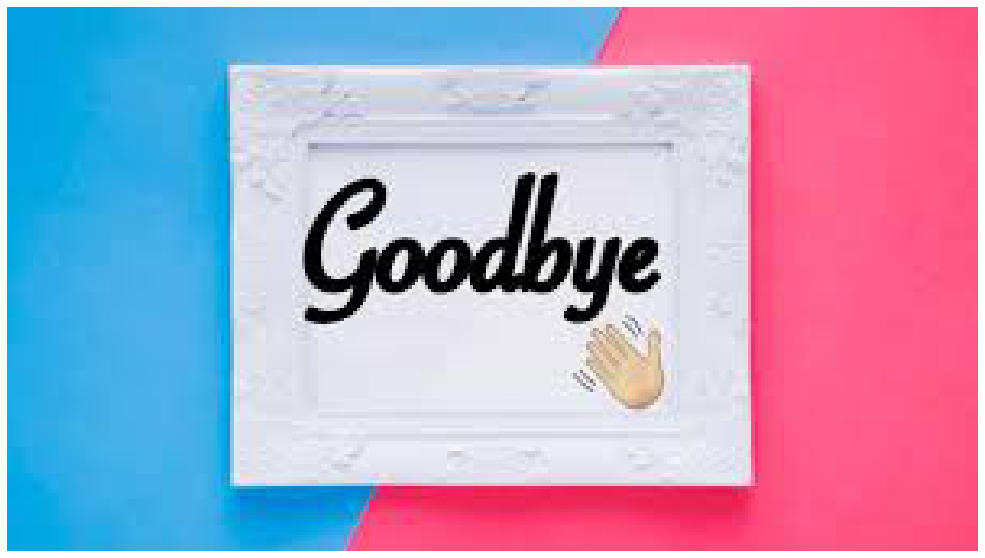

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
|Welcome to the USER menu, hit 'ENTER' to summon the main menu|
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Please enter command:
Exit
******************************
***Program Closed, goodbye~***
******************************


In [ ]:
#C:\Users\alienware\Desktop\GPK\GPK_saves\GPK_save_11_19
#C:\Users\alienware\Desktop\GPK\GPK_saves\Ryan_PB
GPK(server_online,"18066060855",321890,True)